In [1]:
import pandas as pd
import numpy as np

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
sales_data = pd.read_csv('sales_data.csv', index_col=False)

In [3]:
sales_data.head(5)

,Order Date,Order Quantity,Sales ID,Sales,Product Name,Product Sub-Category,Product Category,Discount,Unit Price,Product Base Margin,...,Advertising Expenditure,Sales Representative,Product Review Rating,Customer ID,Customer Name,Customer Segment,Email ID,Address,Region,Region ID
0,10/13/2010,6,101,224.2944,"Eldon Base for stackable storage shelf, platinum",Storage & Organization,Office Supplies,0.04,38.94,0.80,...,1.9470,1,3,CG-12520,Claire Gute,Small Business,claire_gute@example.com,"Henderson, Kentucky",South,1
1,10/1/2012,49,102,9485.8512,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Appliances,Office Supplies,0.07,208.16,0.58,...,10.4080,1,1,CG-12520,Claire Gute,Consumer,claire_gute@example.com,"Henderson, Kentucky",South,1
2,10/1/2012,27,103,232.2837,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Binders and Binder Accessories,Office Supplies,0.01,8.69,0.39,...,0.4345,1,5,DV-13045,Darrin Van Huff,Consumer,darrin_huff@example.com,"Los Angeles, California",West,2
3,7/10/2011,30,104,5409.3240,R380,Telephones and Communication,Technology,0.08,195.99,0.58,...,29.3985,3,1,SO-20335,Sean O'Donnell,Corporate,sean_o'donnell@example.com,"Fort Lauderdale, Florida",South,1
4,8/28/2010,19,105,380.7144,Holmes HEPA Air Purifier,Appliances,Office Supplies,0.08,21.78,0.50,...,1.0890,2,2,SO-20335,Sean O'Donnell,Consumer,sean_o'donnell@example.com,"Fort Lauderdale, Florida",South,1


In [4]:
# Check for missing values
missing_values = sales_data.isnull().sum()

# Return columns with missing values
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()

print("Columns with Missing Values:")
print(columns_with_missing_values)

Columns with Missing Values:
['Product Base Margin', 'Profit']


In [5]:
# Fill missing values with the mean
sales_data['Product Base Margin'].fillna(sales_data['Product Base Margin'].mean(), inplace=True)
sales_data['Profit'].fillna(sales_data['Profit'].mean(), inplace=True)

/var/folders/c4/1tfbz9yd20l_ymtzv6_9ph8h0000gn/T/ipykernel_16873/2496954191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['Product Base Margin'].fillna(sales_data['Product Base Margin'].mean(), inplace=True)
/var/folders/c4/1tfbz9yd20l_ymtzv6_9ph8h0000gn/T/ipykernel_16873/2496954191.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interme

In [6]:
# Multiply the columns by 100 to convert to percentage format
#sales_data['Discount'] = pd.to_numeric(sales_data['Discount'], errors='coerce') * 100
#sales_data['Product Base Margin'] = pd.to_numeric(sales_data['Product Base Margin'], errors='coerce') * 100


#sales_data

# Level 3 : Exploratory Data Analysis (EDA)

### 1. Visualize the distribution of sales amounts using a histogram.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10, 8

[]

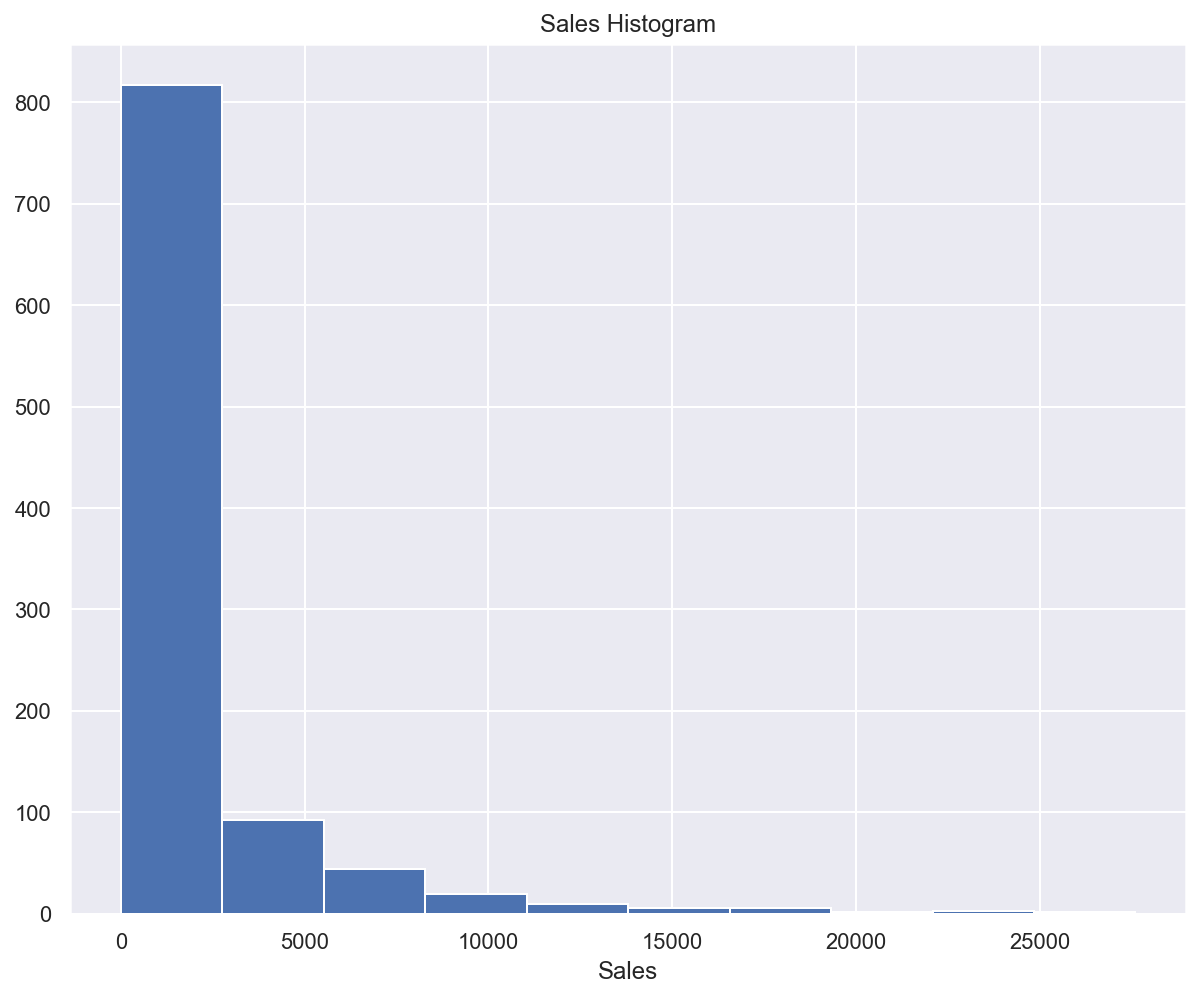

In [8]:
sales = sales_data["Sales"]
plt.hist(sales)
plt.title('Sales Histogram')
plt.xlabel('Sales')
plt.plot()

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Order Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>],
       [<AxesSubplot:title={'center':'Unit Price'}>,
        <AxesSubplot:title={'center':'Product Base Margin'}>]],
      dtype=object)

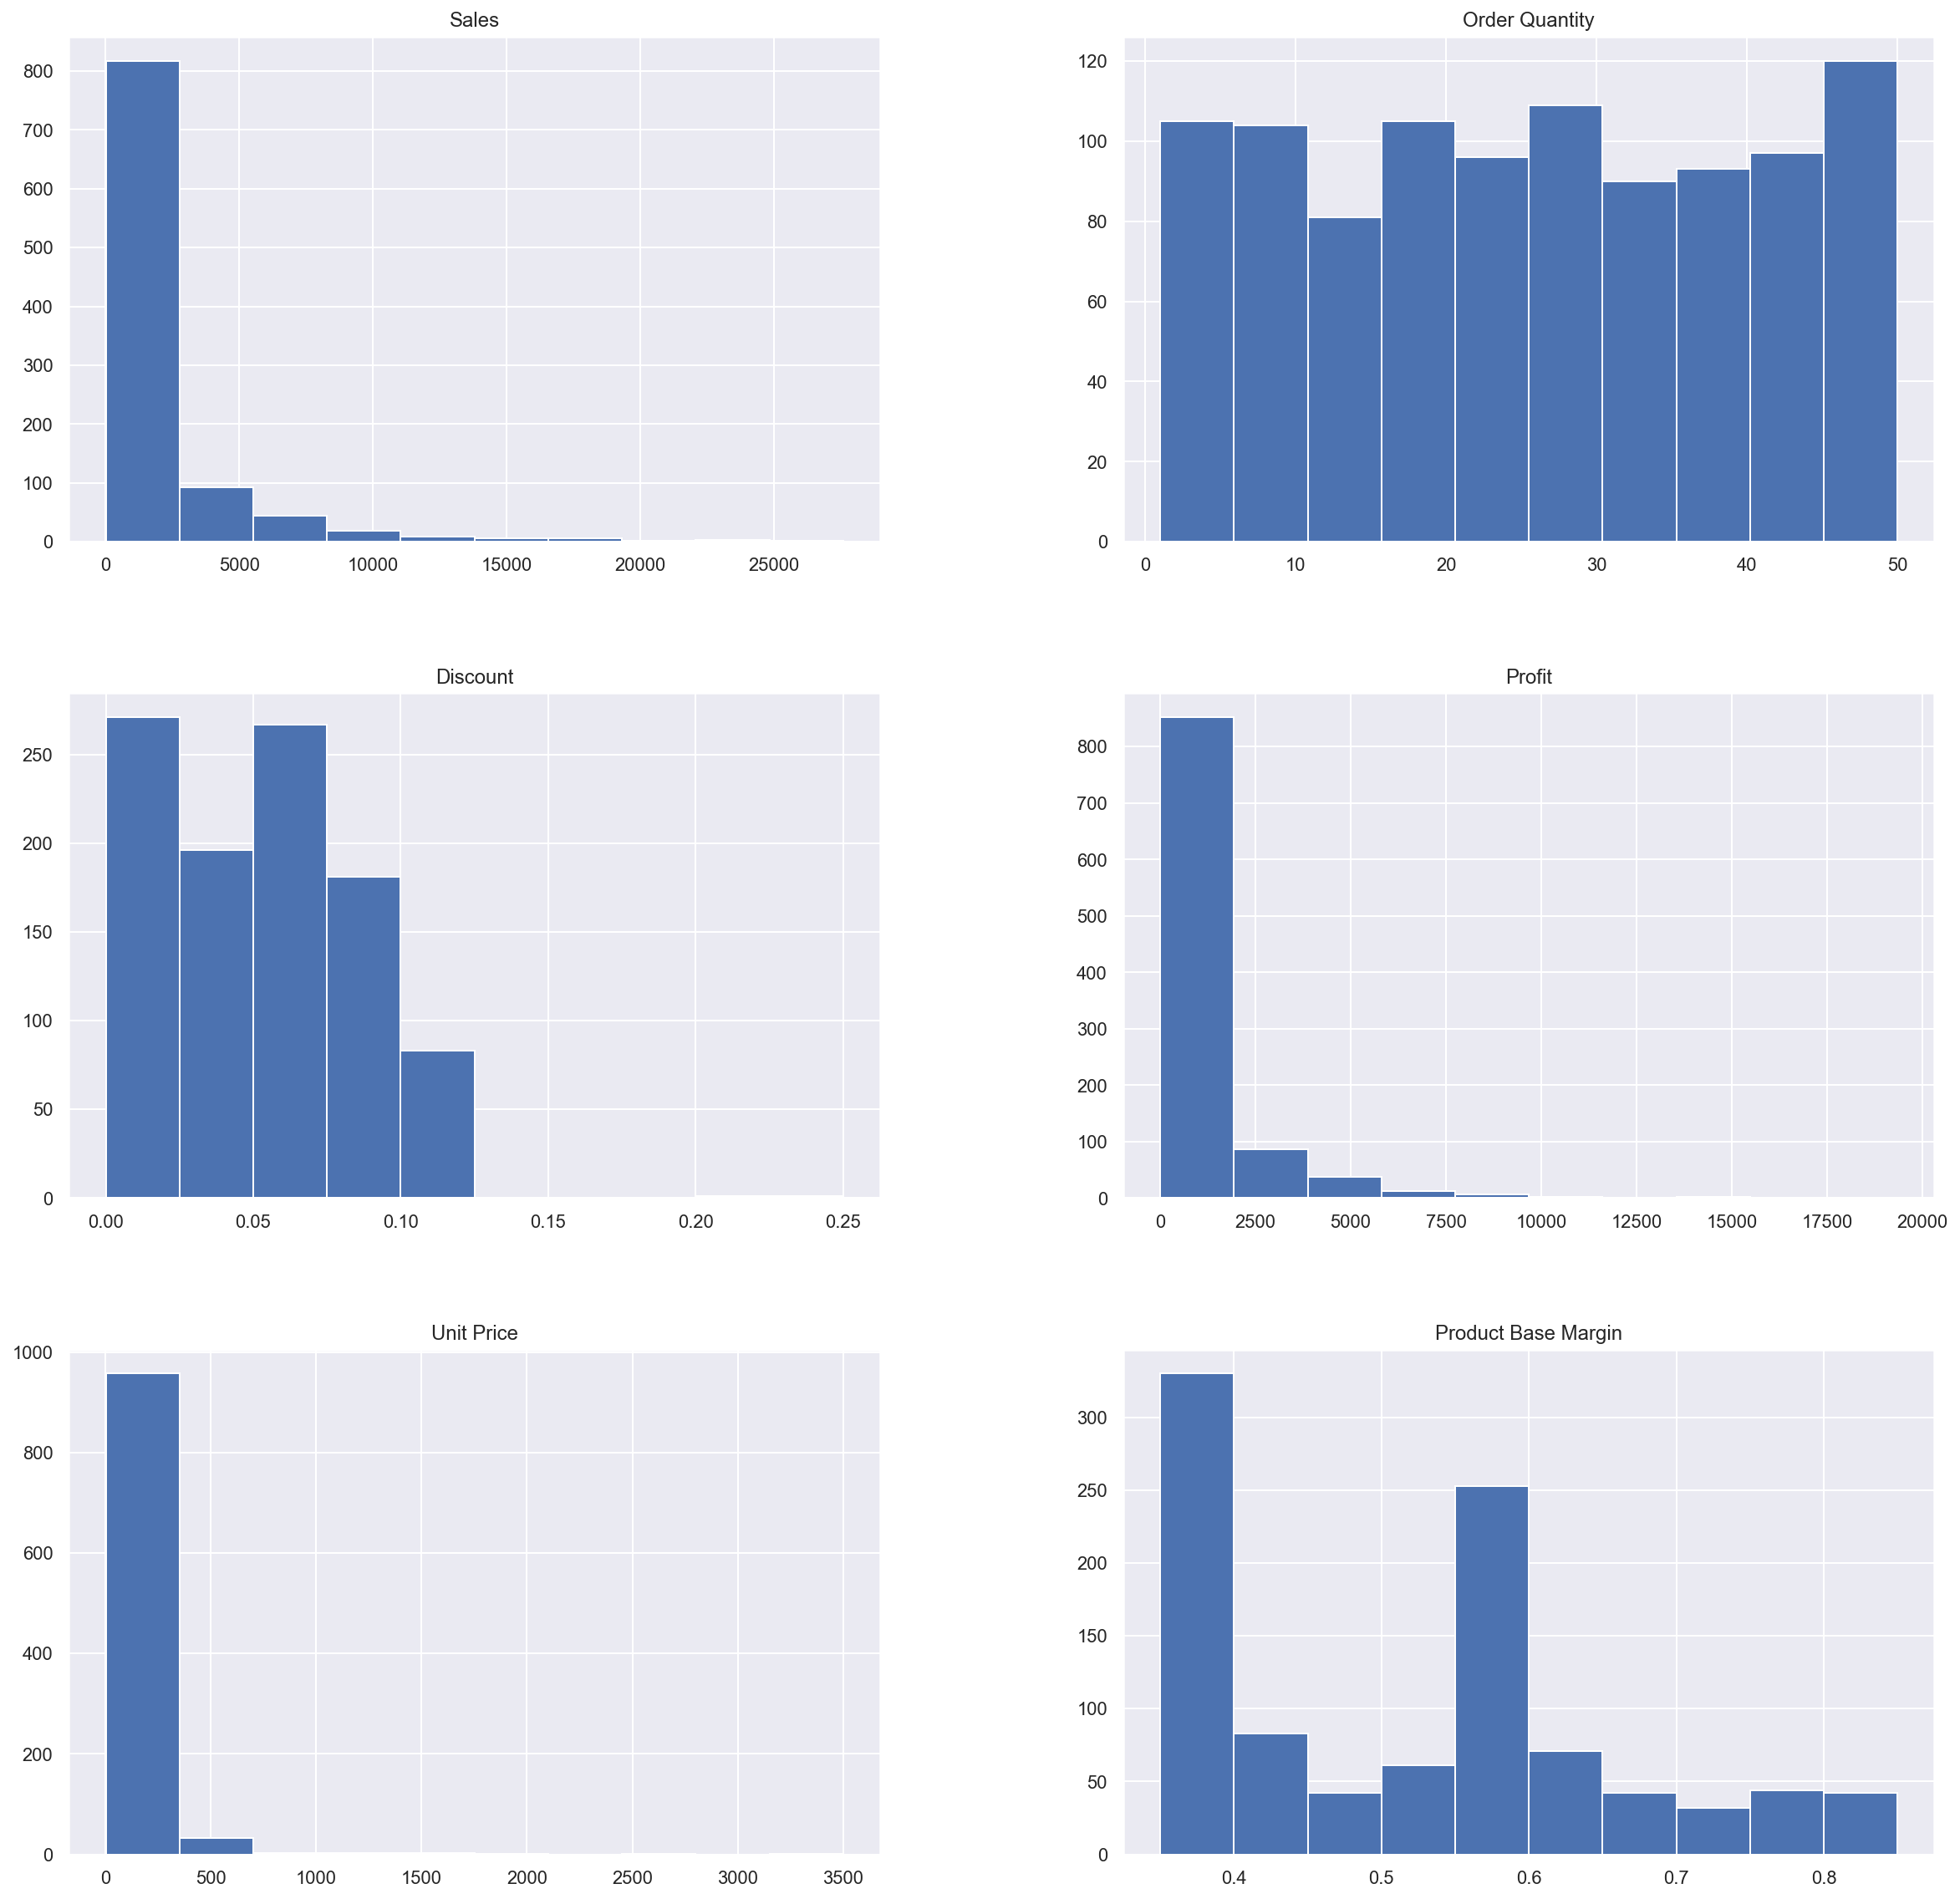

In [9]:
num_variables = ['Sales','Order Quantity','Discount','Profit','Unit Price','Product Base Margin']
sales_data.hist(num_variables, figsize=(20,20))

### 2. Create a boxplot to identify any outliers in the sales data.

Text(0.5, 0, 'Sales')

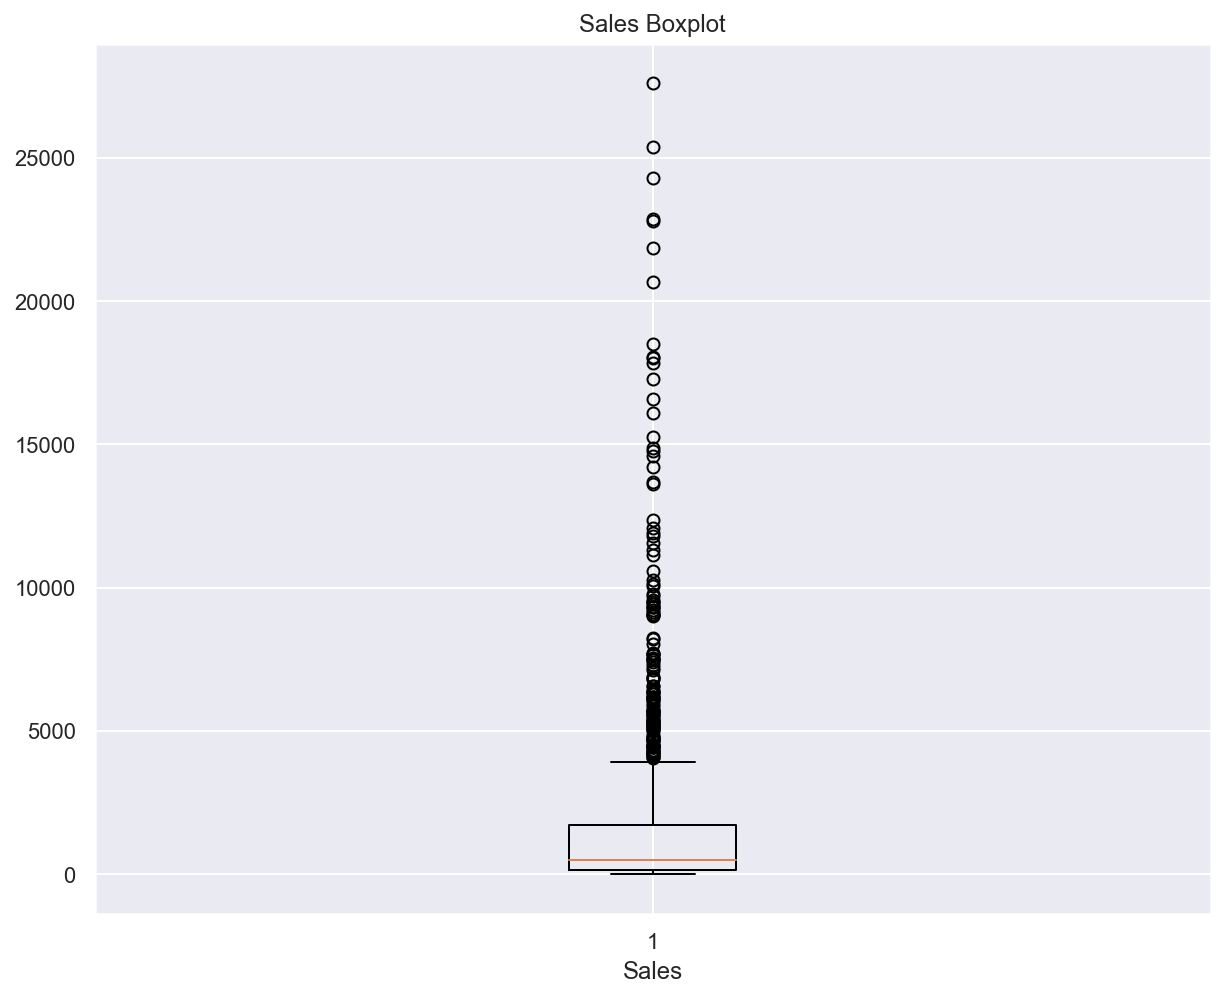

In [10]:
plt.boxplot(sales)
plt.title('Sales Boxplot')
plt.xlabel('Sales')

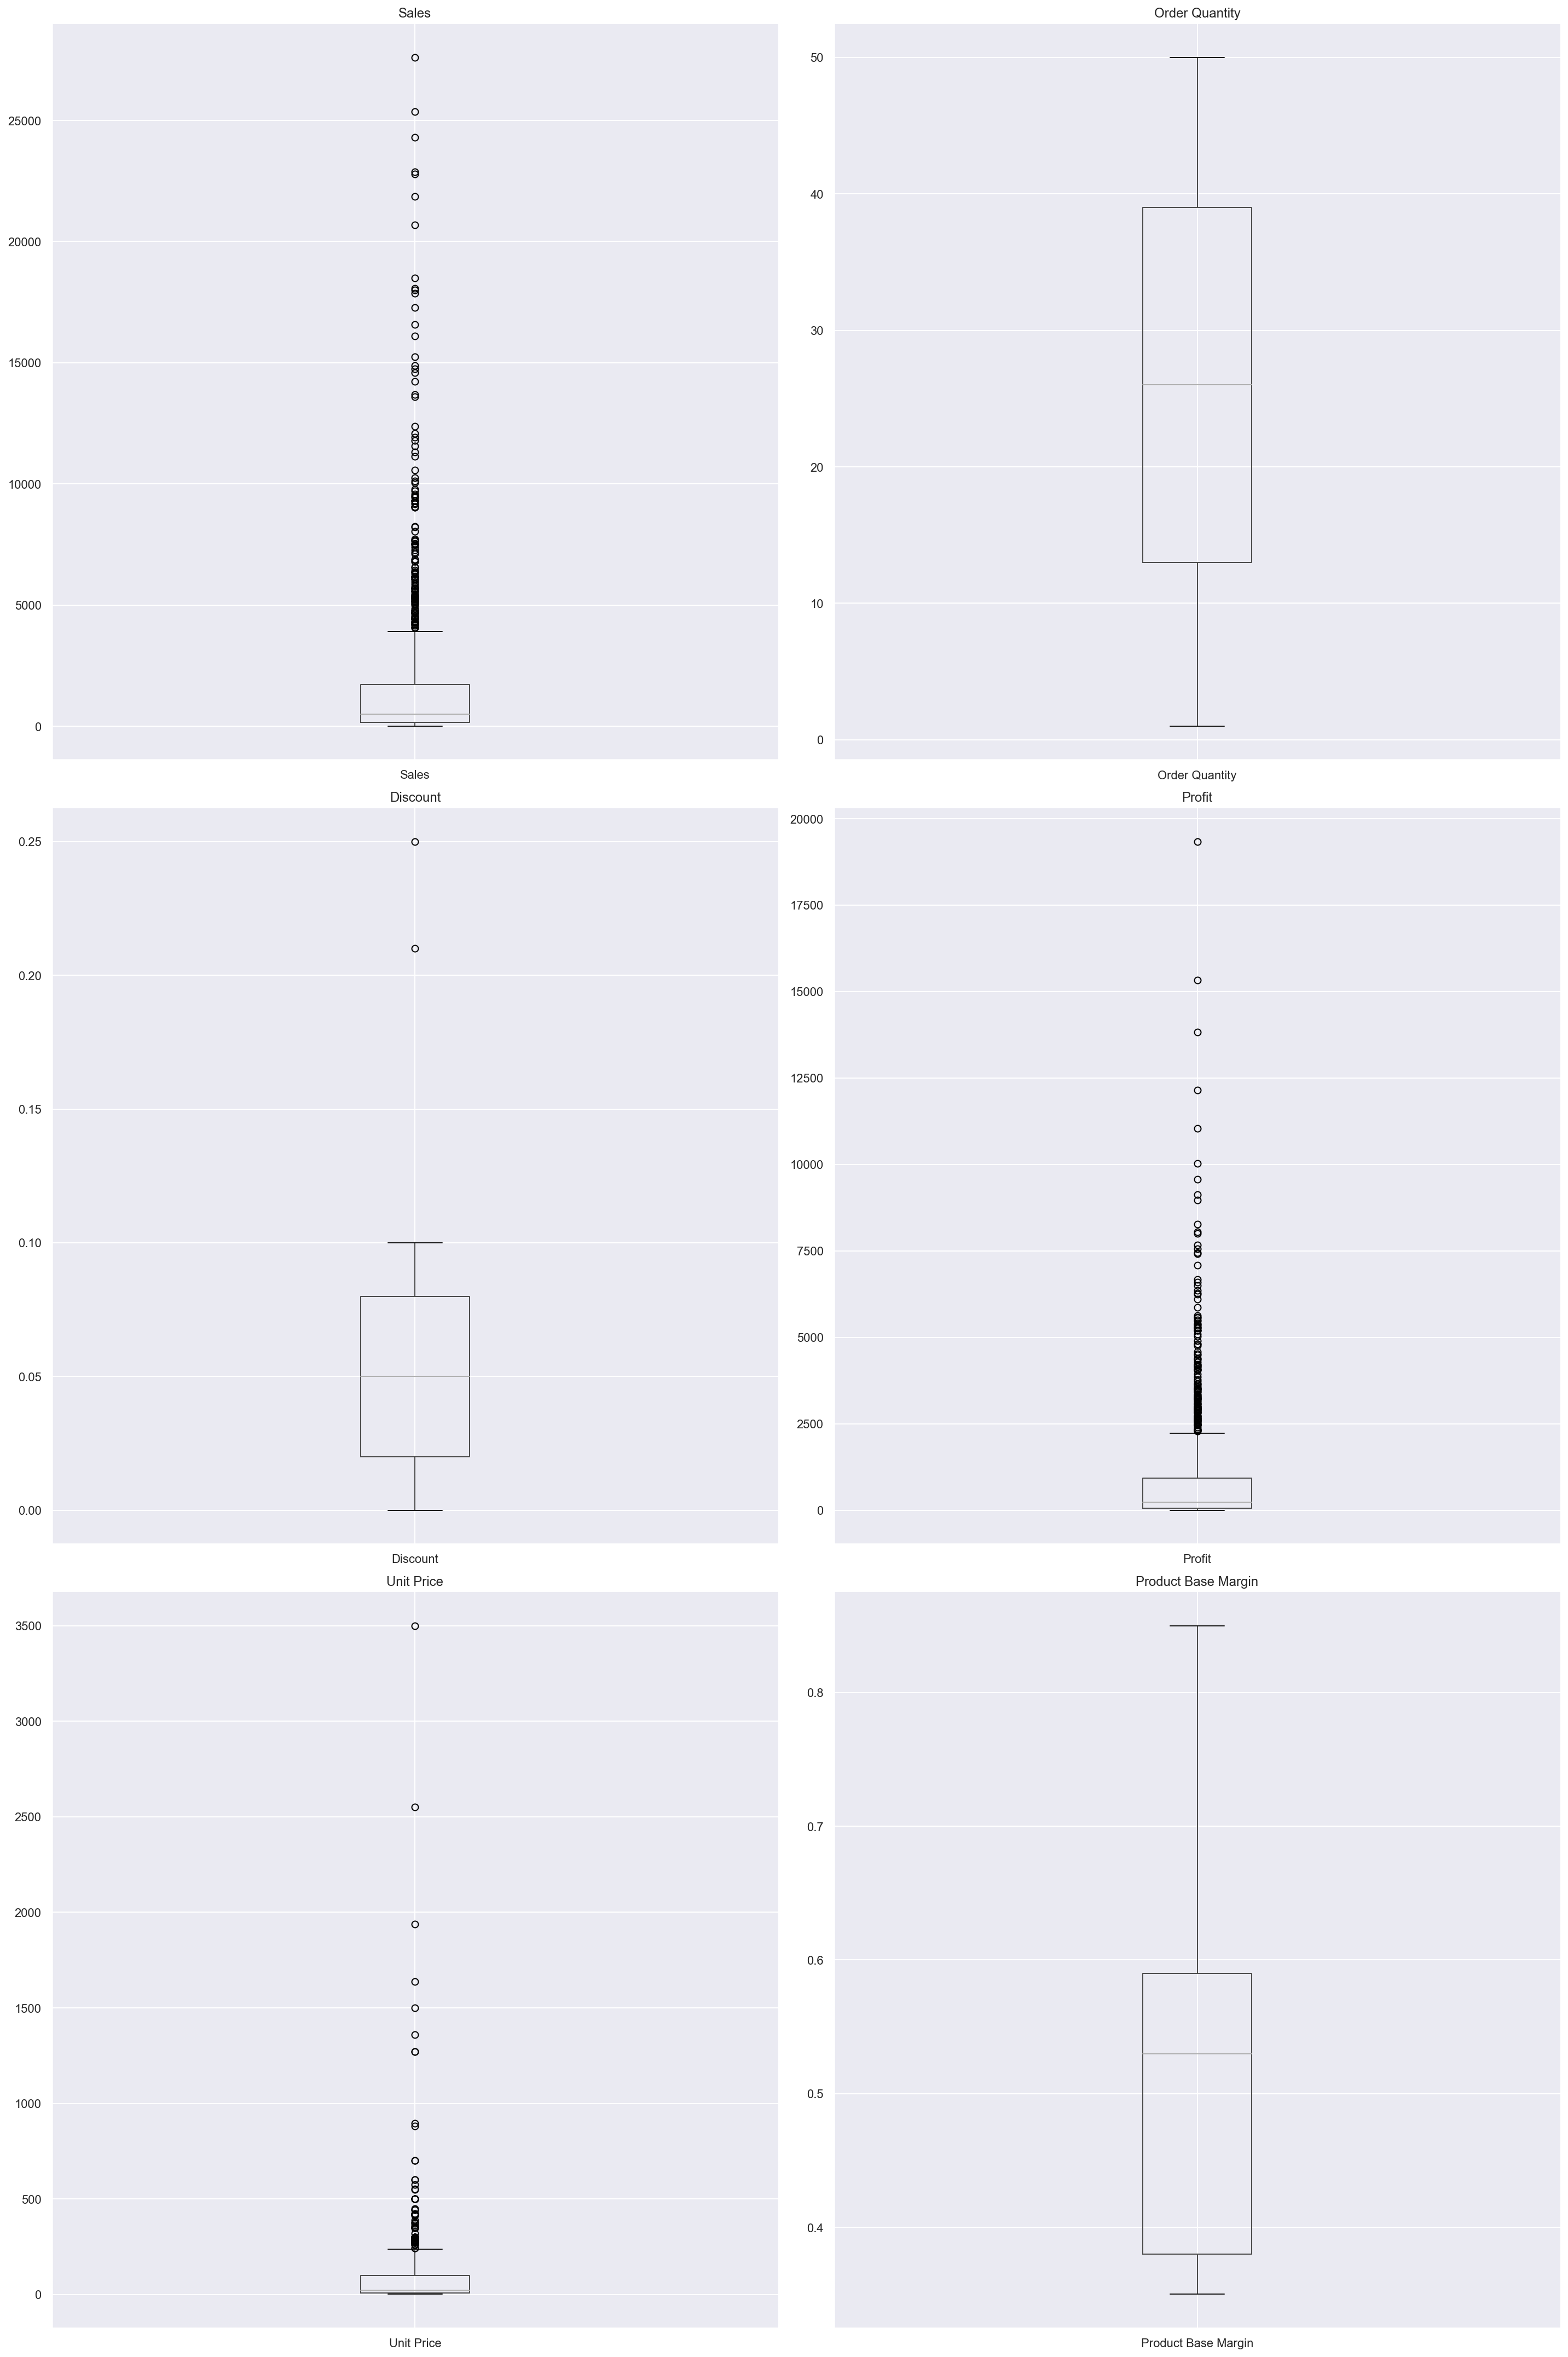

In [11]:
num_data = sales_data[num_variables]

n_cols = 2  # Set the number of columns to 2
n_rows = -(-len(num_variables) // n_cols)  # Round up division

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 10*n_rows))
axs = axs.flatten()

for i, col in enumerate(num_variables):
    num_data.boxplot(column=col, ax=axs[i])
    axs[i].set_title(col)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
    # Hide the axis labels for the last row of subplots
    if i >= n_cols * (n_rows - 1):
        axs[i].set_xlabel('')

# Remove any empty subplots
for i in range(len(num_variables), len(axs)):
    axs[i].remove()

plt.tight_layout()
plt.show()

In [12]:
def treat_outliers(data, columns, percentile_threshold):
    for col in columns:
        # Calculate the percentile value
        cutoff_value = data[col].quantile(percentile_threshold / 100)
        # Replace outliers with the cutoff value
        data[col] = data[col].clip(upper=cutoff_value)


percentile_threshold = 95

columns_to_treat = ['Sales', 'Discount', 'Profit','Unit Price']

treat_outliers(sales_data, columns_to_treat, percentile_threshold)


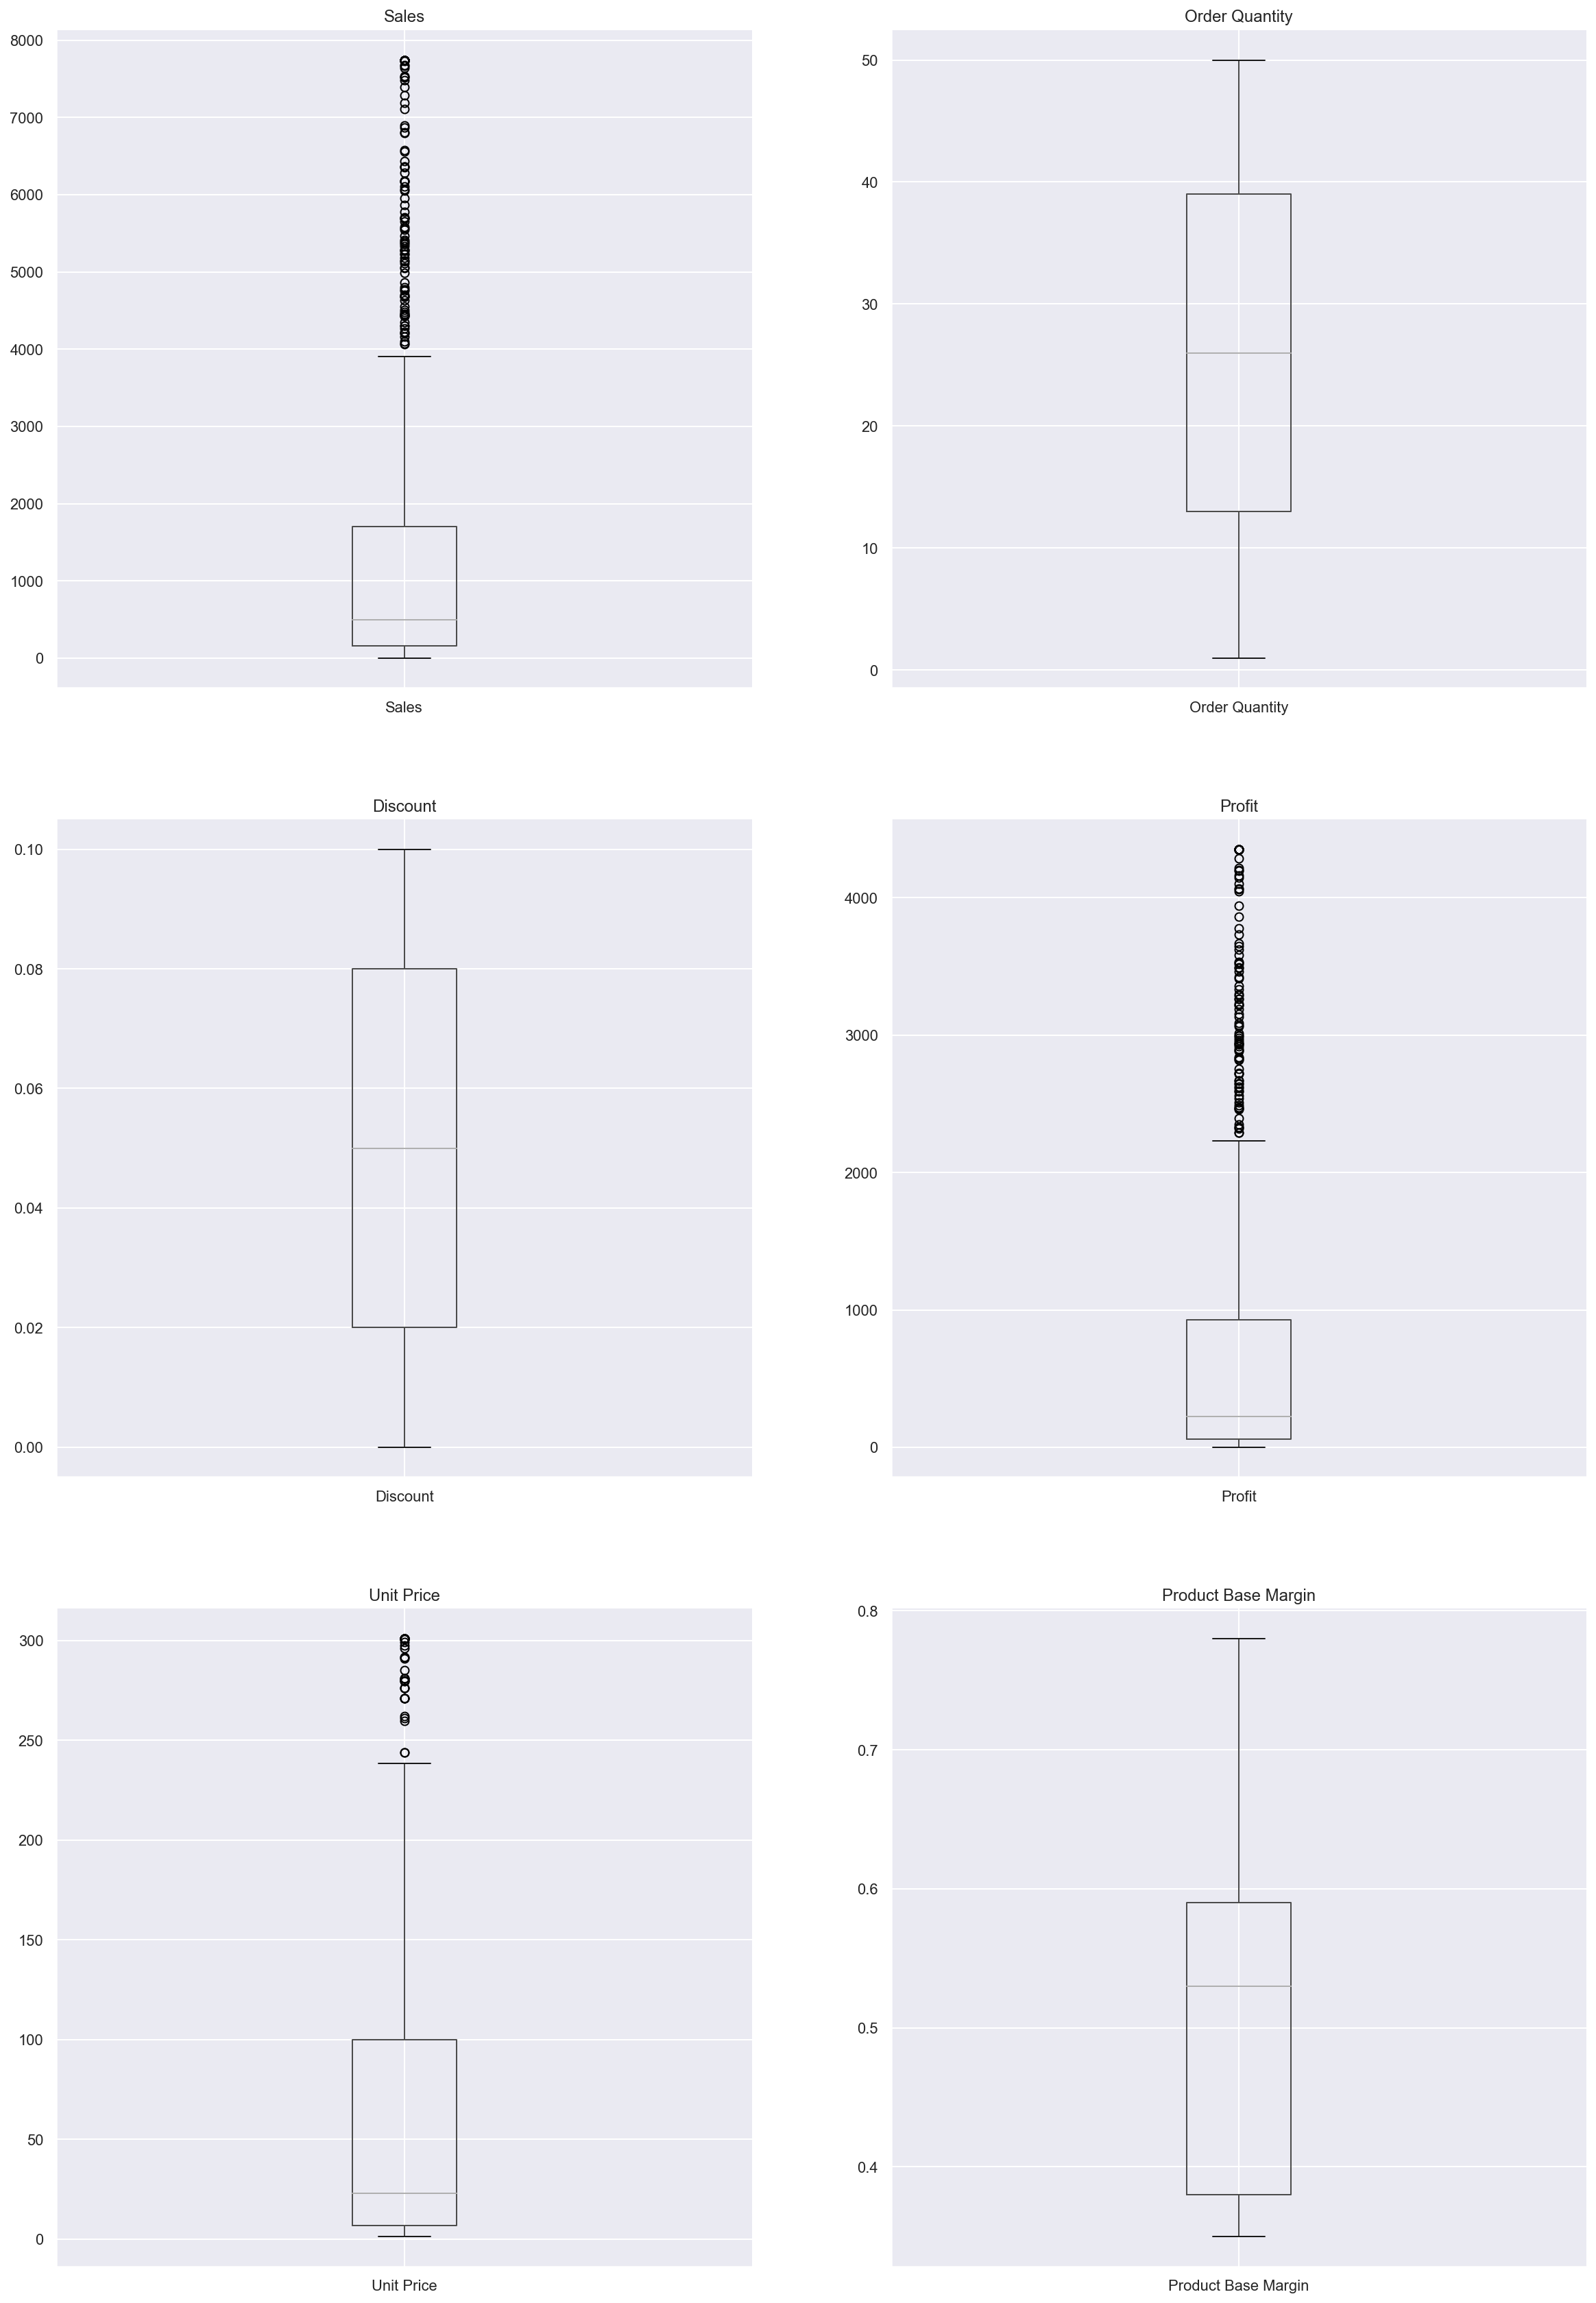

In [13]:
num_data = sales_data[num_variables]

n_cols = 2
n_rows = -(-len(num_variables) // n_cols)  # Round up division

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 10*n_rows))
axs = axs.flatten()

for i, col in enumerate(num_variables):
    num_data.boxplot(column=col, ax=axs[i])
    axs[i].set_title(col)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
    # Hide the axis labels for the last row of subplots
    if i >= n_cols * (n_rows - 1):
        axs[i].set_xlabel('')

# Remove any empty subplots
for i in range(len(num_variables), len(axs)):
    axs[i].remove()

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Order Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>],
       [<AxesSubplot:title={'center':'Unit Price'}>,
        <AxesSubplot:title={'center':'Product Base Margin'}>]],
      dtype=object)

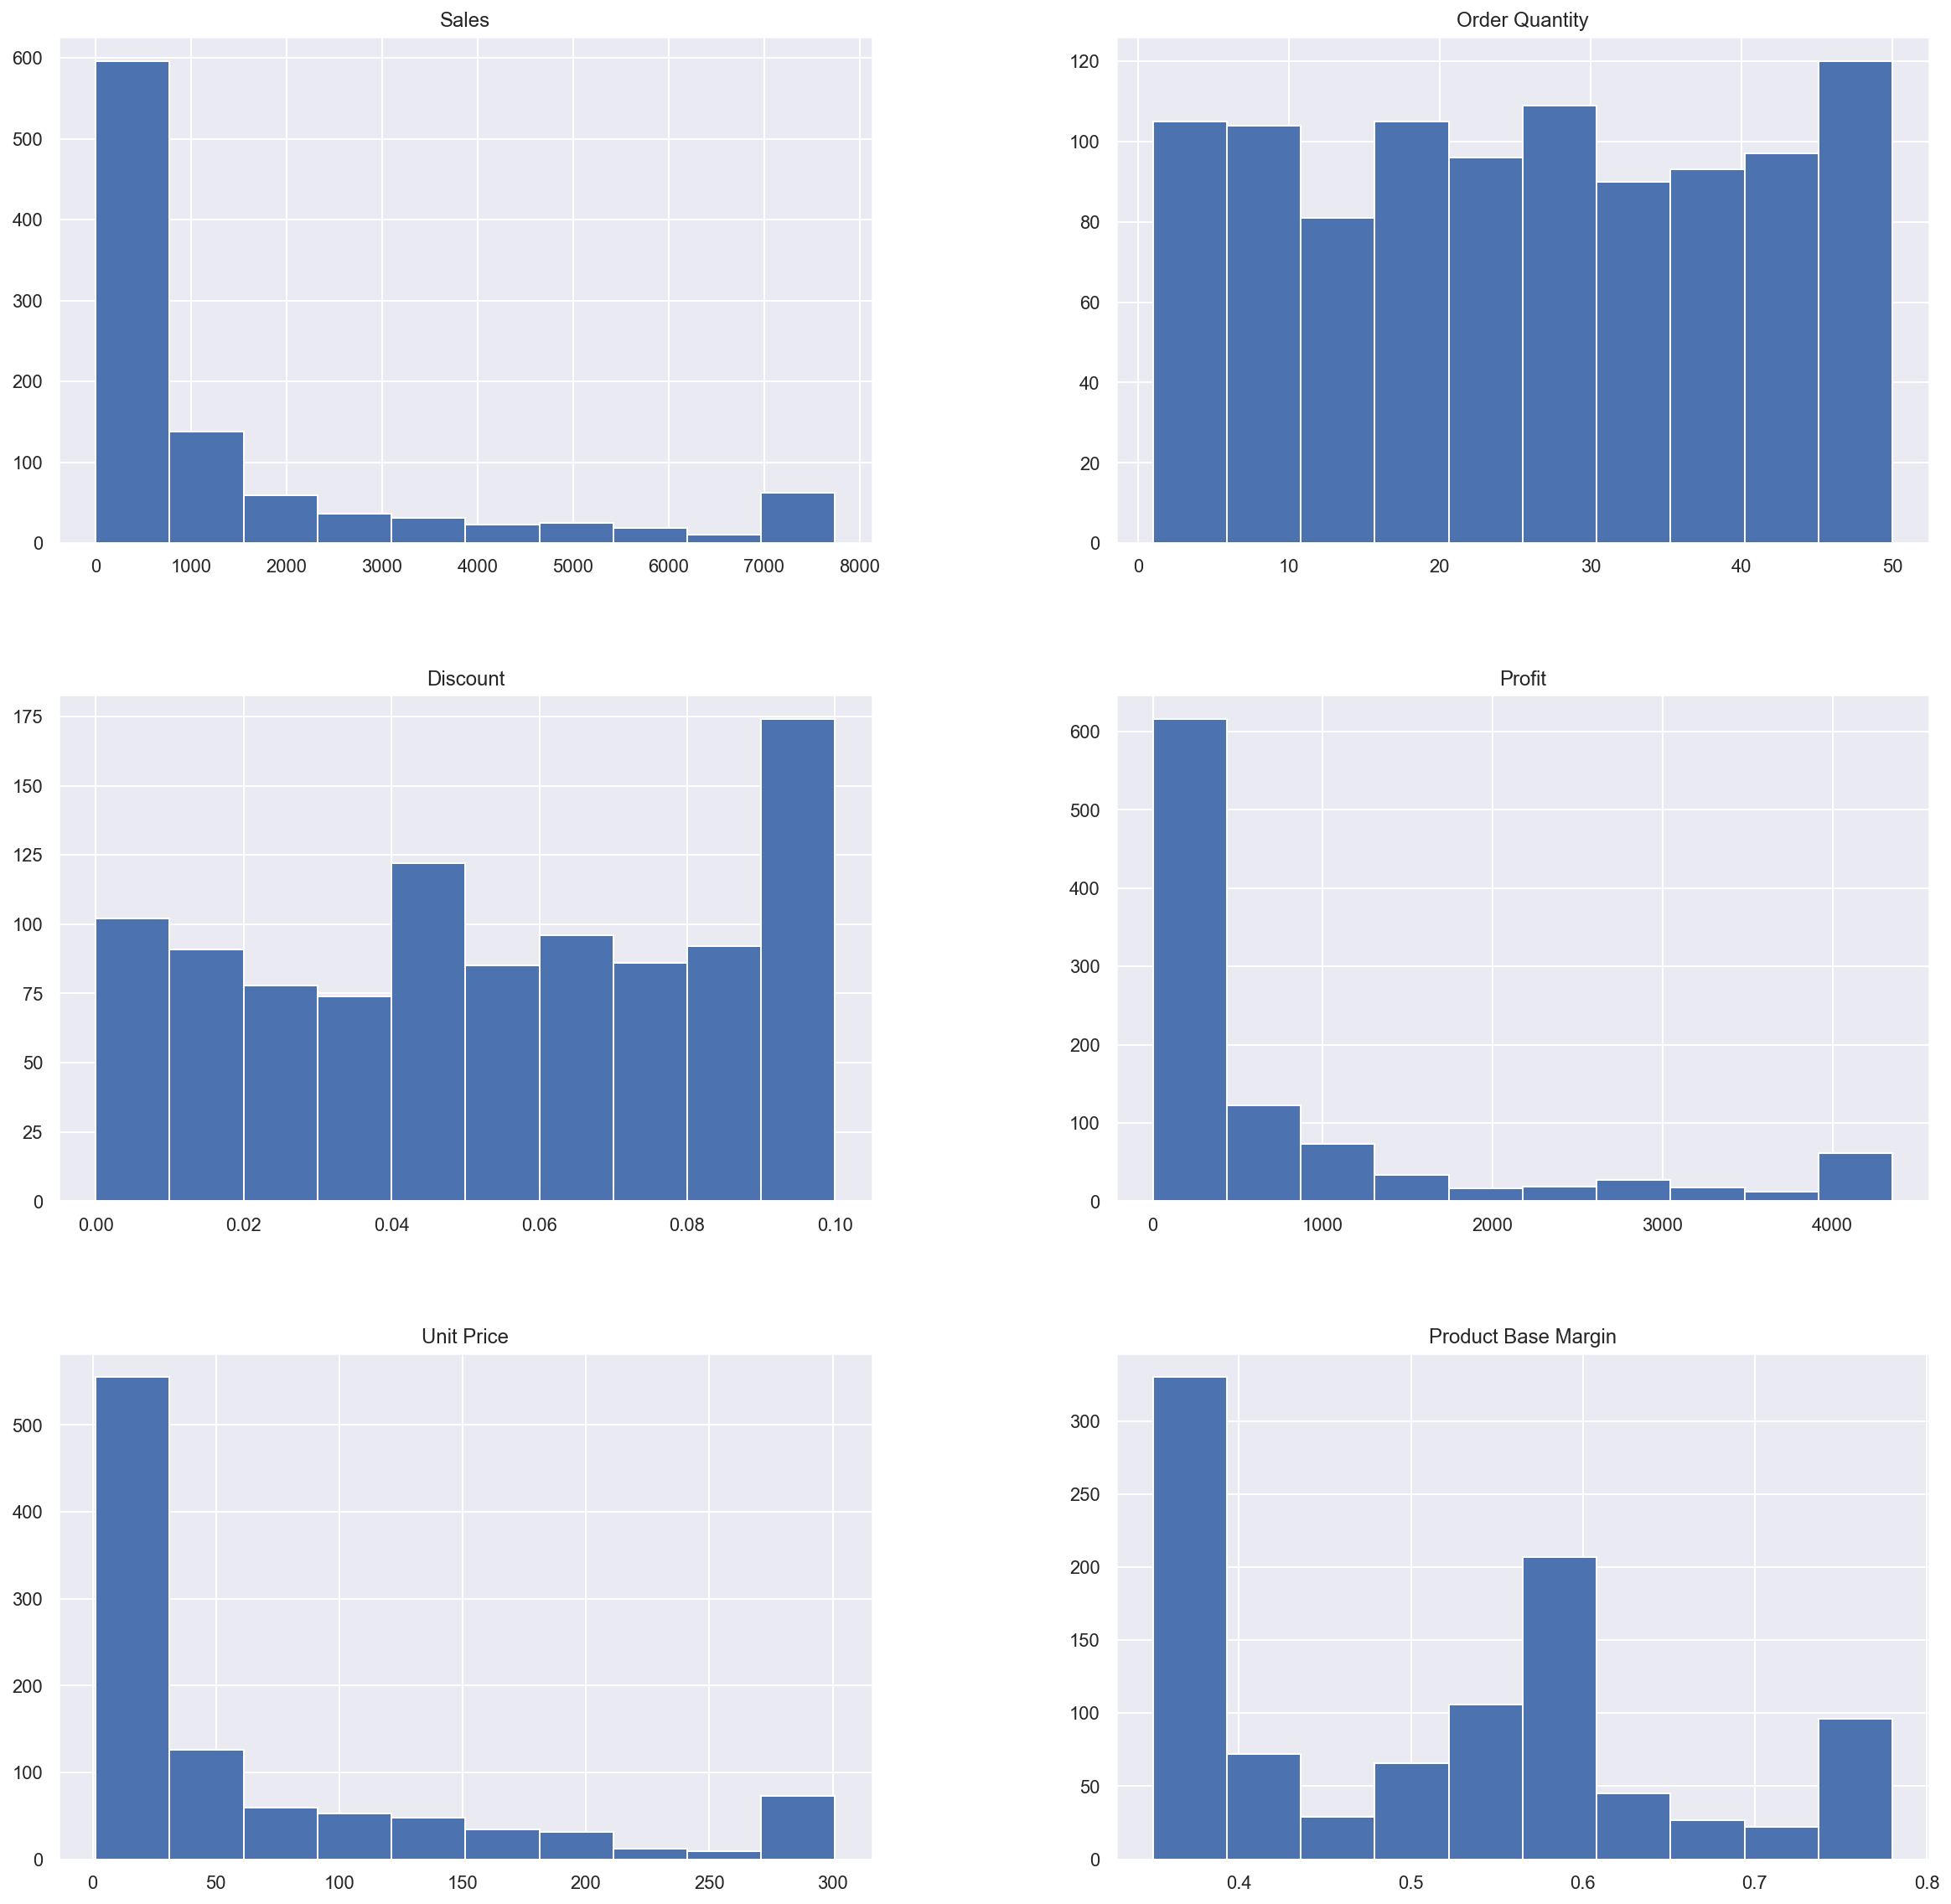

In [14]:
sales_data.hist(num_variables, figsize=(20,20))

- Sales, Profit, Unit Price : Bimodal Distribution
- Order Quantity, Discount : Uniform Disctribution
- Product Base Margin : Multimodal Disctribution

### 3. Explore the relationship between sales and other variables using scatter plots.

### Sales vs Order Quantity

Text(0.5, 1.0, 'Sales vs Order Quantity')

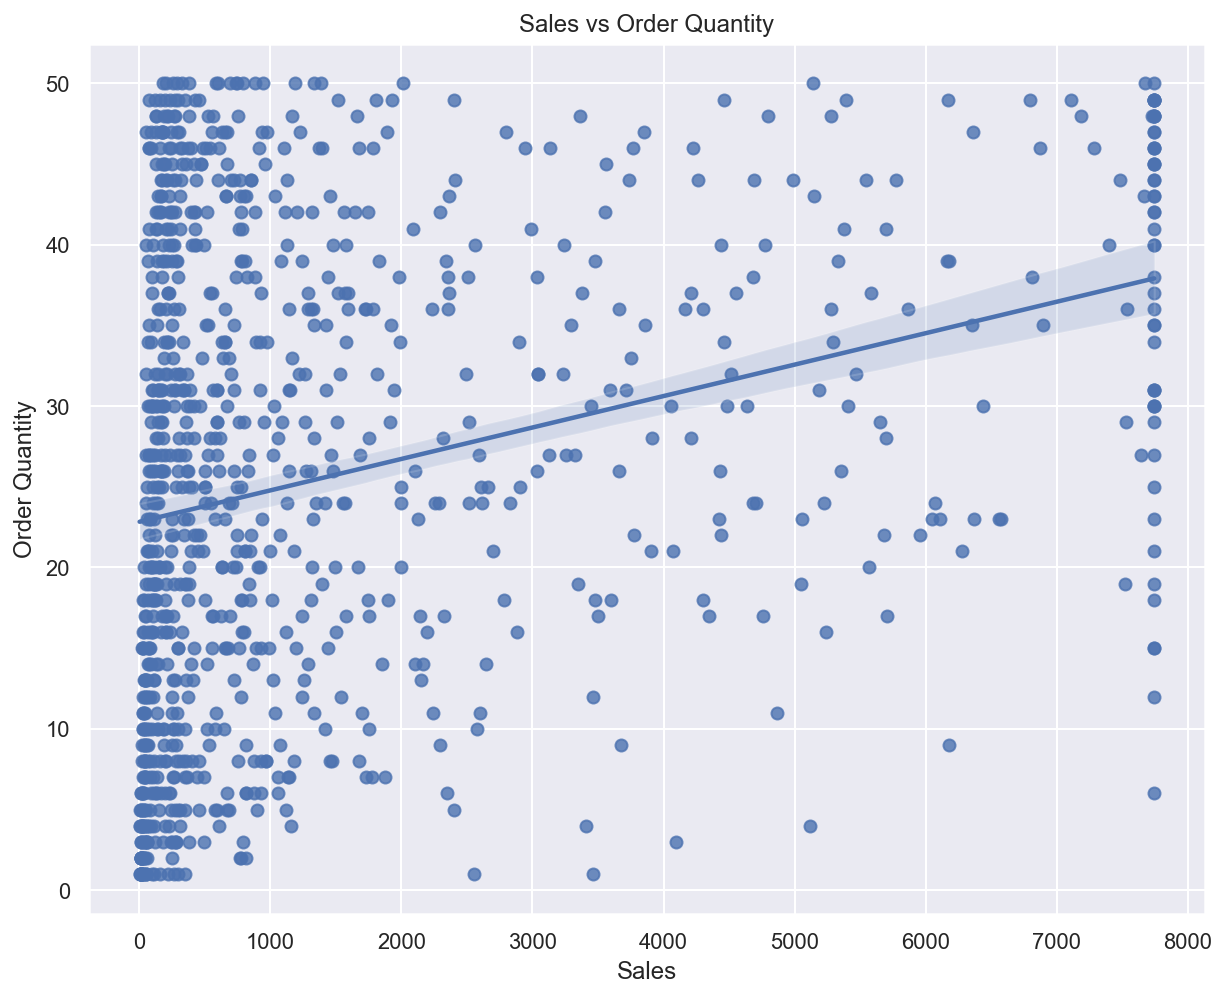

In [15]:
sb.regplot(x="Sales", y="Order Quantity", data=sales_data, scatter=True)
plt.title('Sales vs Order Quantity')

### Sales vs Discount

Text(0.5, 1.0, 'Sales vs Discount')

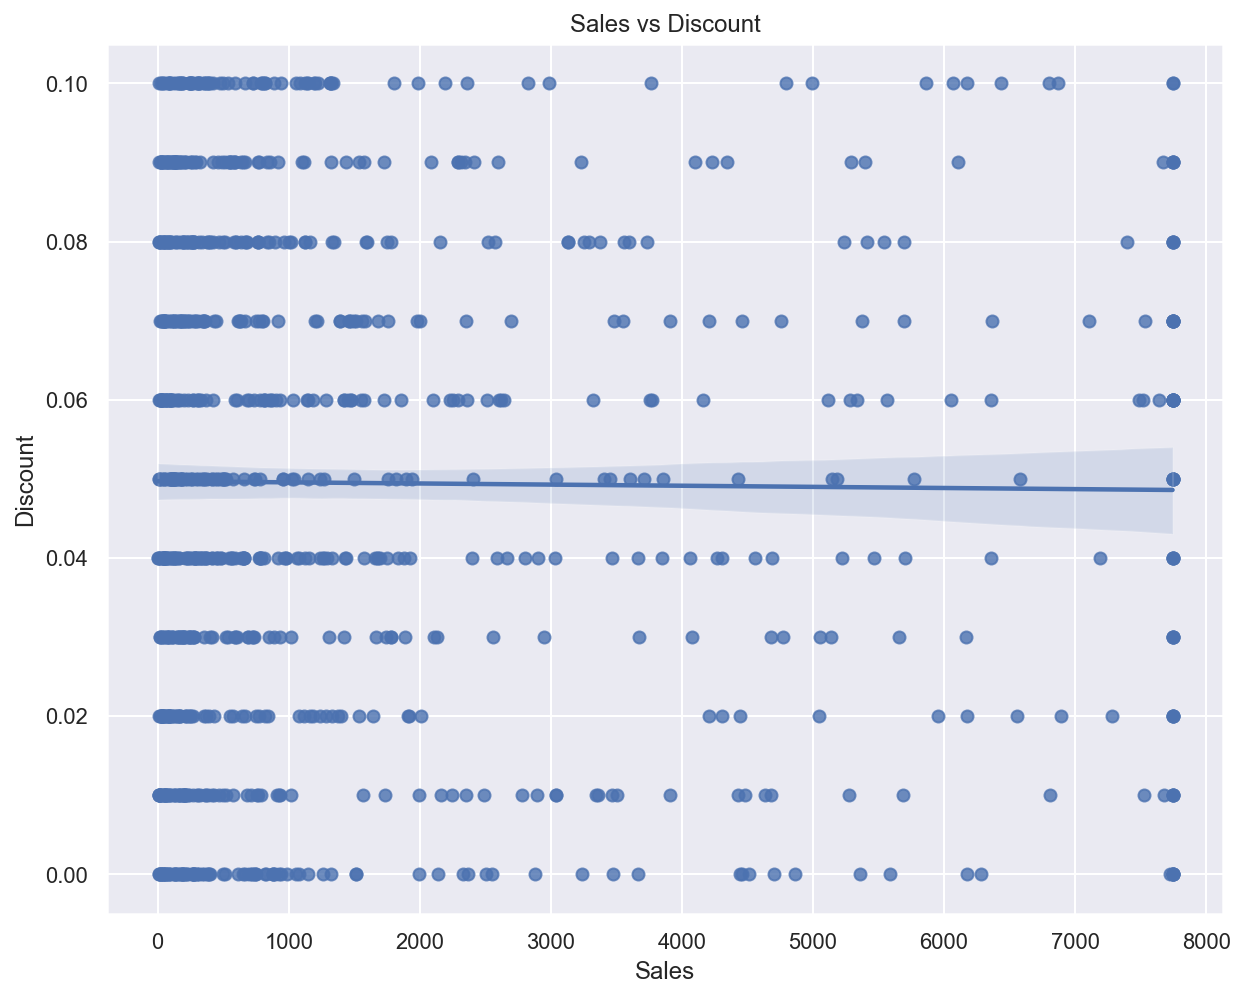

In [16]:
sb.regplot(x="Sales", y="Discount", data=sales_data, scatter=True)
plt.title('Sales vs Discount')

### Sales vs Profit

Text(0.5, 1.0, 'Sales vs Profit')

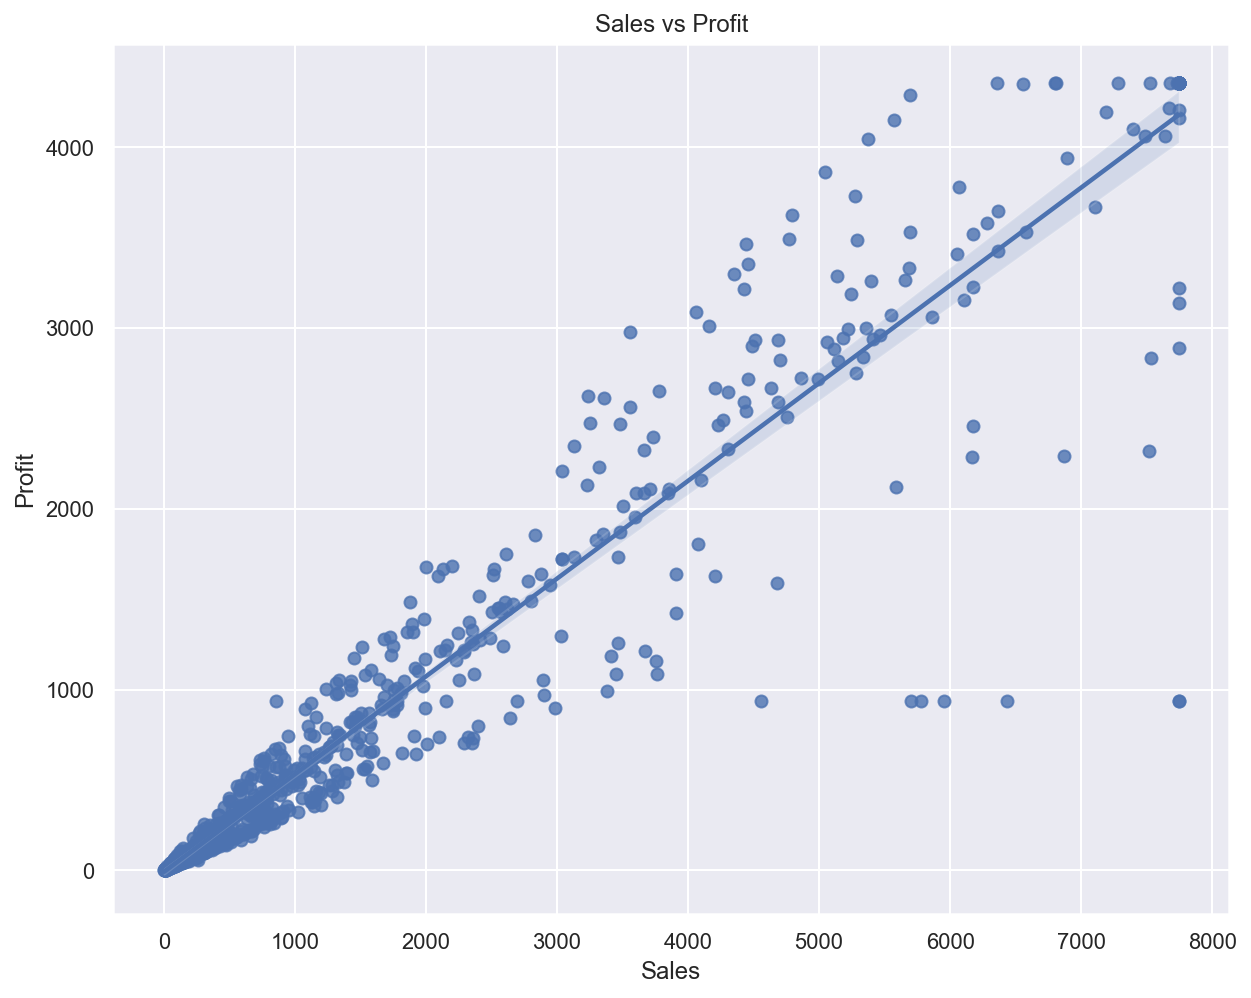

In [17]:
sb.regplot(x='Sales', y='Profit', data=sales_data, scatter=True)
plt.title('Sales vs Profit')

### Sales vs Unit Price

Text(0.5, 1.0, 'Sales vs Unit Price')

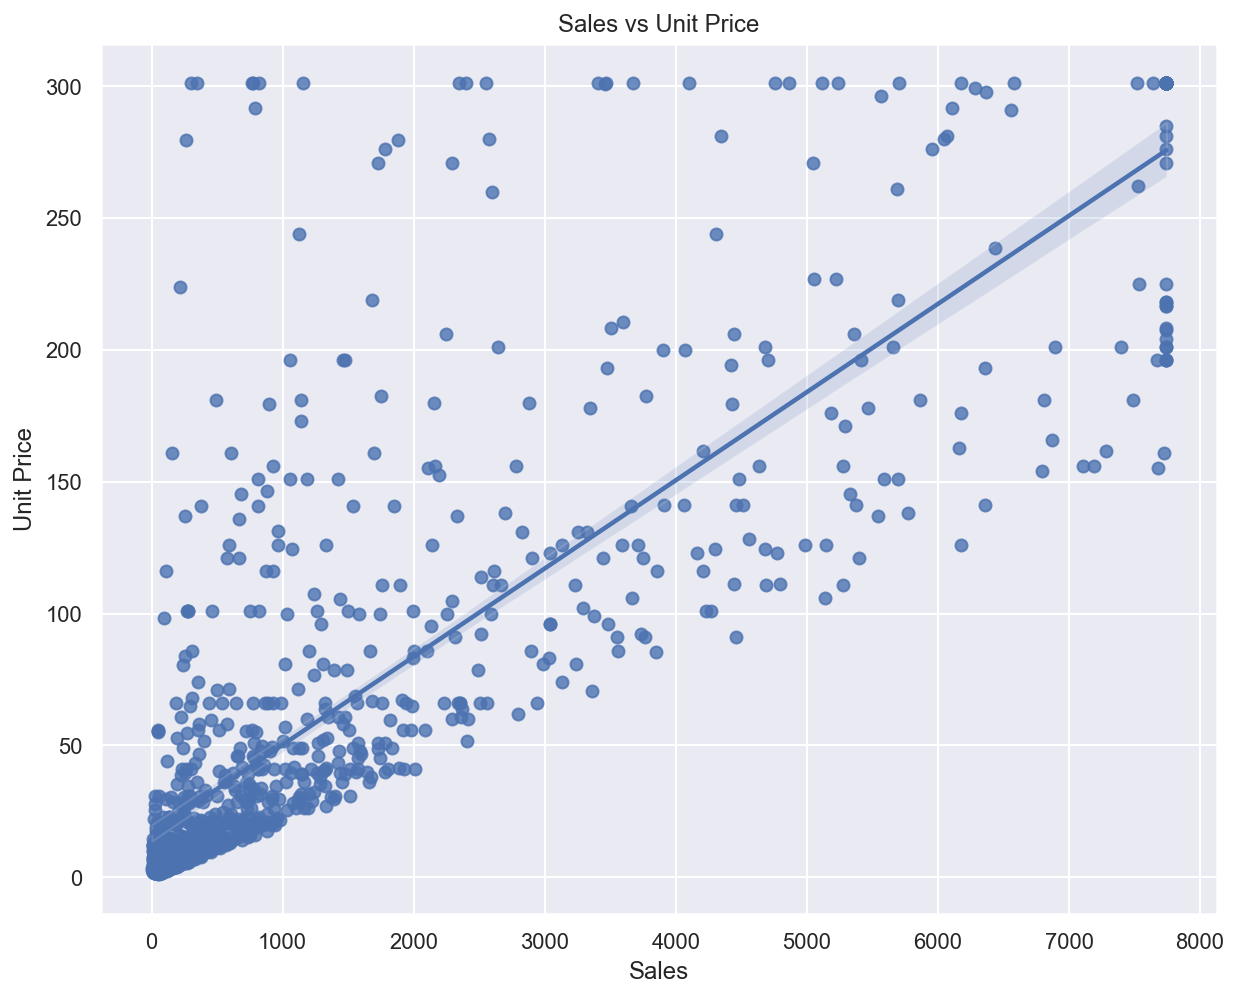

In [18]:
sb.regplot(x='Sales', y='Unit Price', data=sales_data, scatter=True)
plt.title('Sales vs Unit Price')

### Sales vs Product Base Margin

Text(0.5, 1.0, 'Sales vs Product Base Margin')

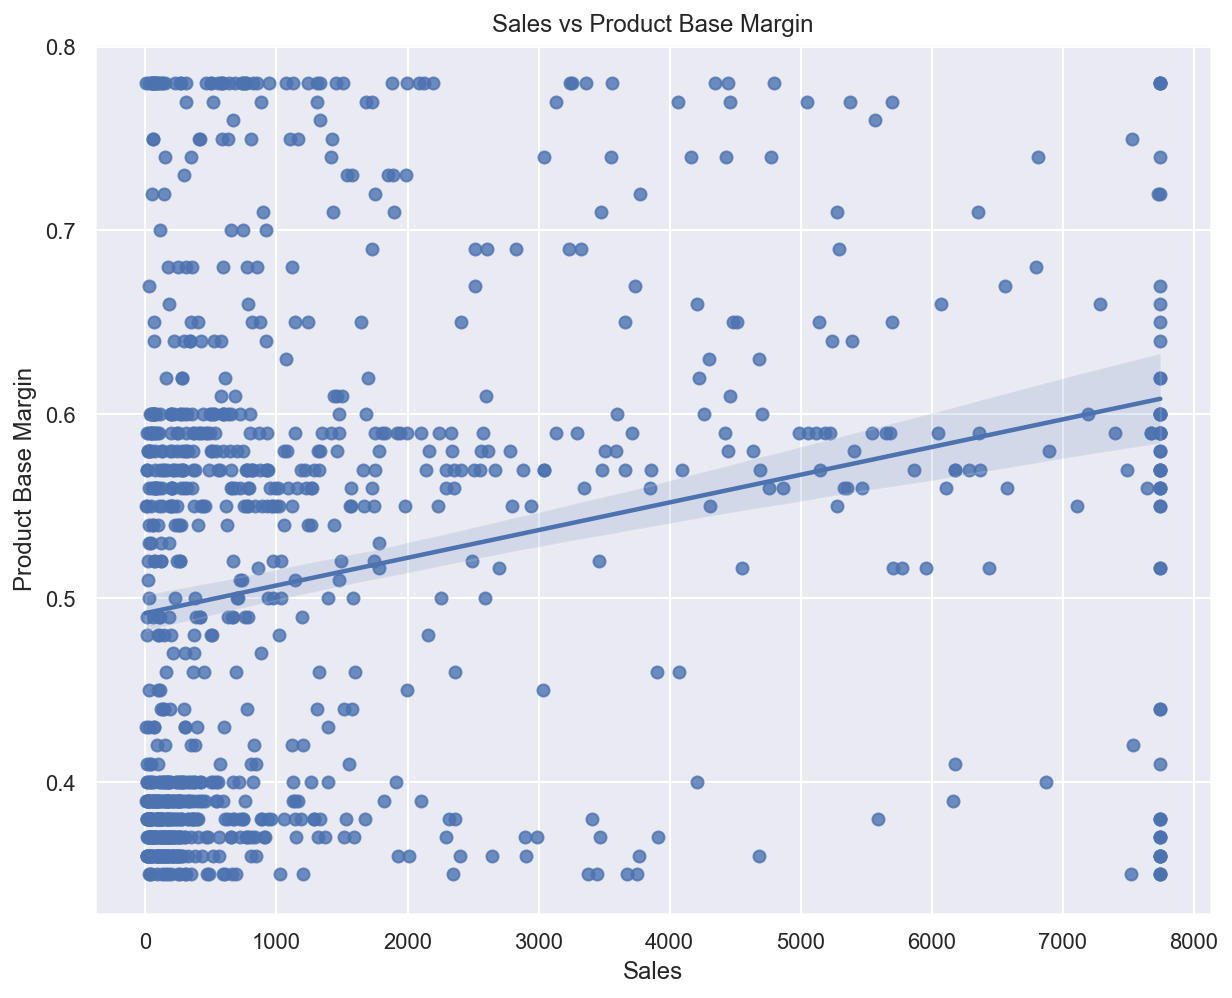

In [19]:
sb.regplot(x='Sales', y='Product Base Margin', data=sales_data, scatter=True)
plt.title('Sales vs Product Base Margin')

### 4. Calculate and visualize the correlation matrix between numerical variables.

### Sales, Order Quantity, Discount, Profit, Unit Price, Product Base Margin

In [21]:
# Creating the correlation matrix
CorrelationData=num_data.corr()
CorrelationData

,Sales,Order Quantity,Discount,Profit,Unit Price,Product Base Margin
Sales,1.000000,0.287512,-0.009817,0.964681,0.833466,0.247005
Order Quantity,0.287512,1.000000,0.021934,0.280374,-0.068371,0.035945
Discount,-0.009817,0.021934,1.000000,-0.010775,0.012865,0.046092
Profit,0.964681,0.280374,-0.010775,1.000000,0.800386,0.351697
Unit Price,0.833466,-0.068371,0.012865,0.800386,1.000000,0.272939
Product Base Margin,0.247005,0.035945,0.046092,0.351697,0.272939,1.000000


Text(0.5, 1.0, 'Numerical Variables Heatmap')

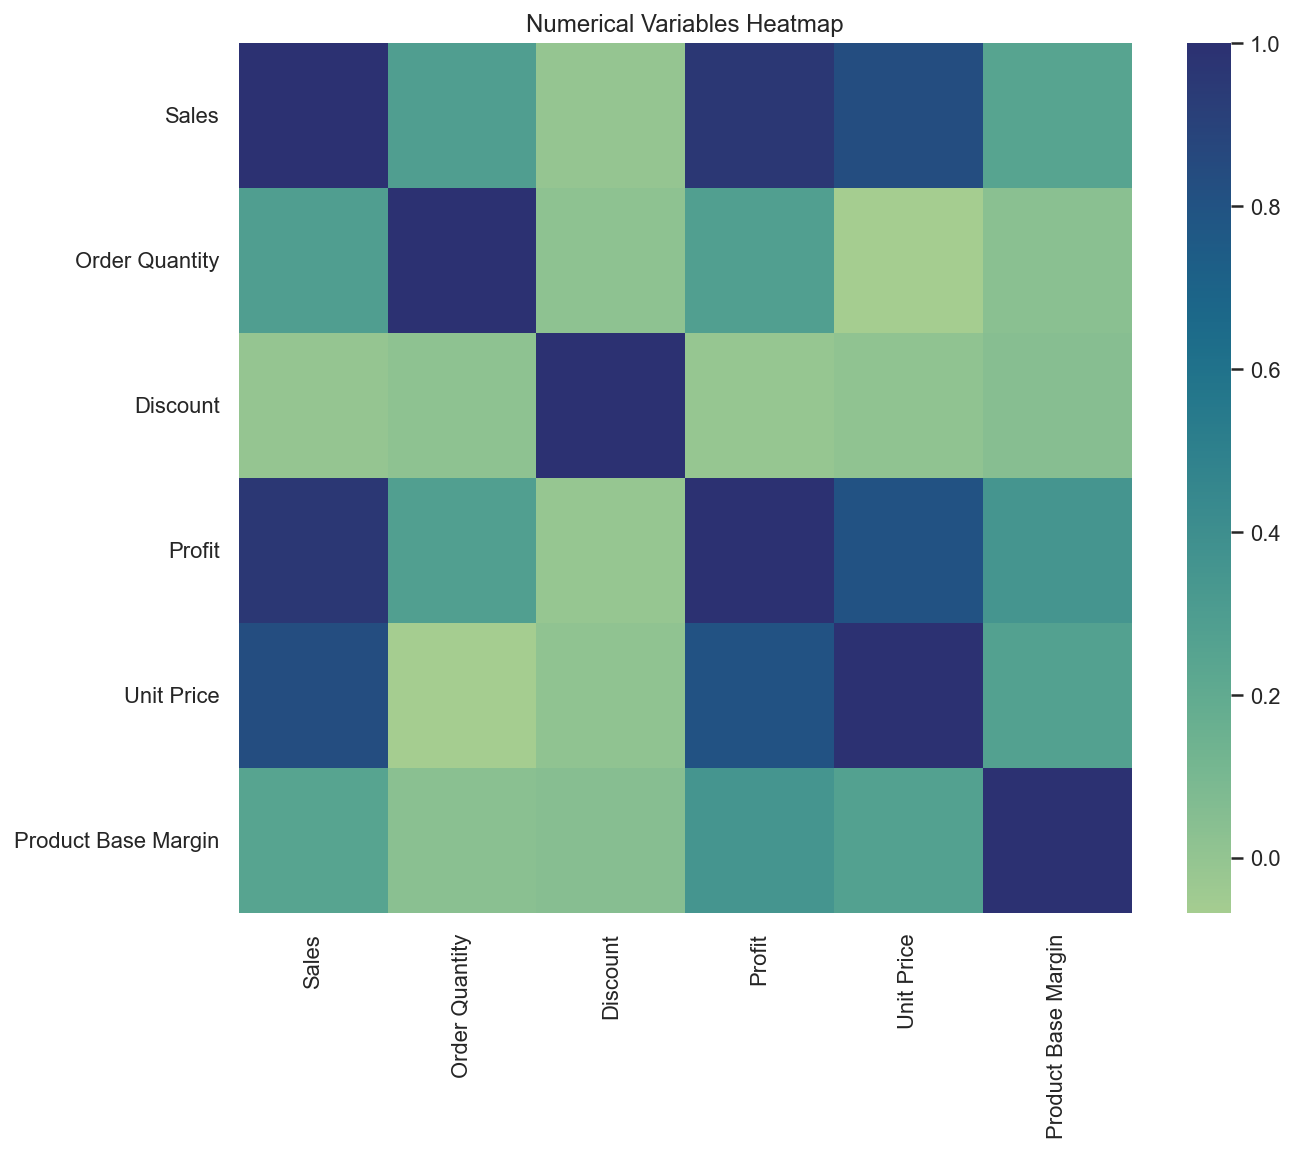

In [44]:
sb.heatmap(CorrelationData,cmap="crest")
plt.title('Numerical Variables Heatmap')

In [22]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
CorrelationData['Sales'][abs(CorrelationData['Sales']) > 0.25 ]

Sales             1.000000
Order Quantity    0.287512
Profit            0.964681
Unit Price        0.833466
Name: Sales, dtype: float64

### Analyzing the relationship between Sales and Discount within each segment separately.

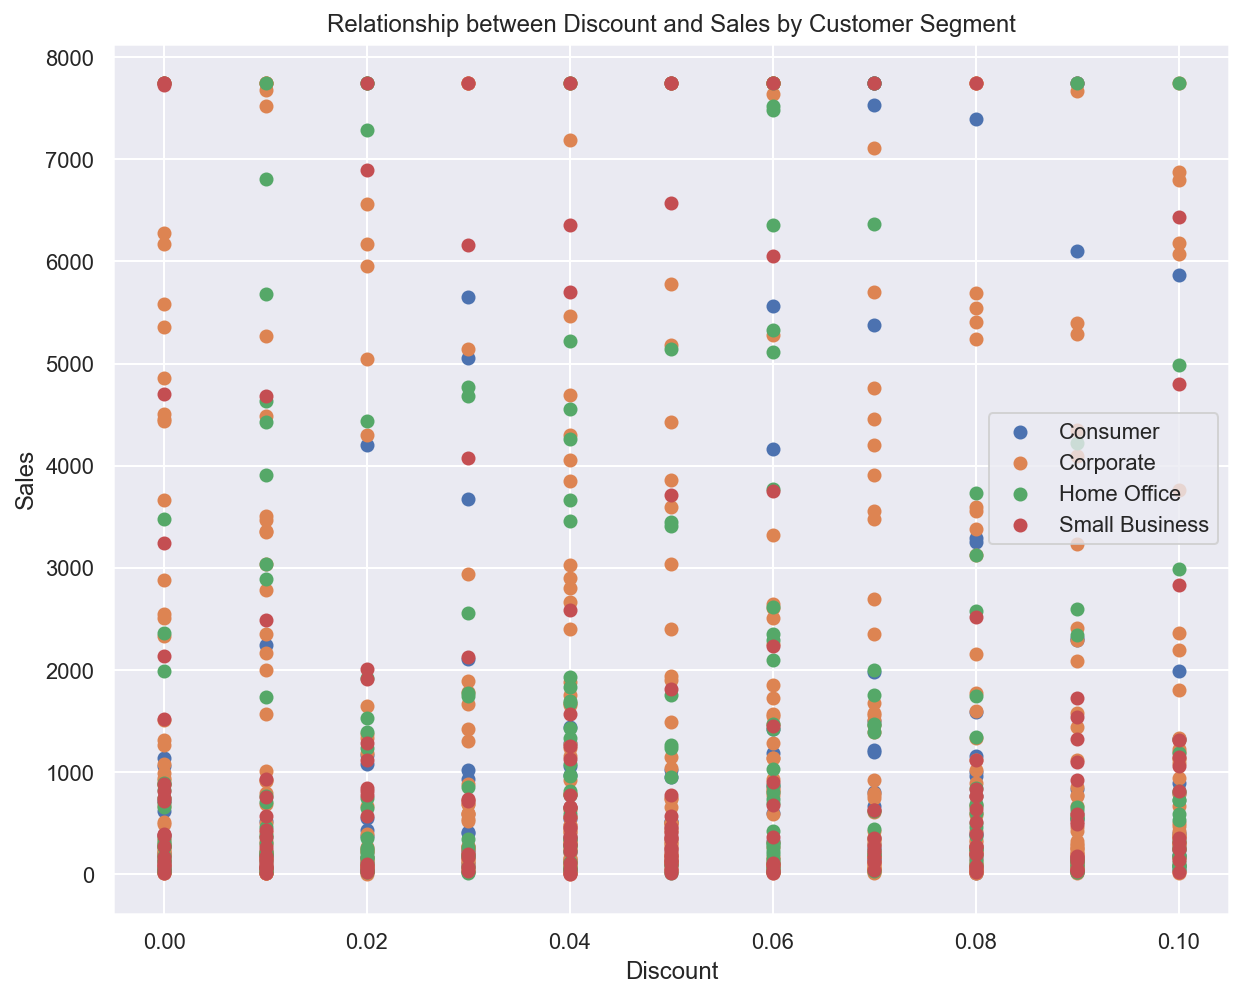

In [38]:
# Group data by industry segment
grouped_data = sales_data.groupby('Customer Segment')

# Plot the relationship for each segment
for segment, group in grouped_data:
    plt.scatter(group['Discount'], group['Sales'], label=segment)


plt.xlabel('Discount')
plt.ylabel('Sales')
plt.title('Relationship between Discount and Sales by Customer Segment')
plt.legend()
plt.show()

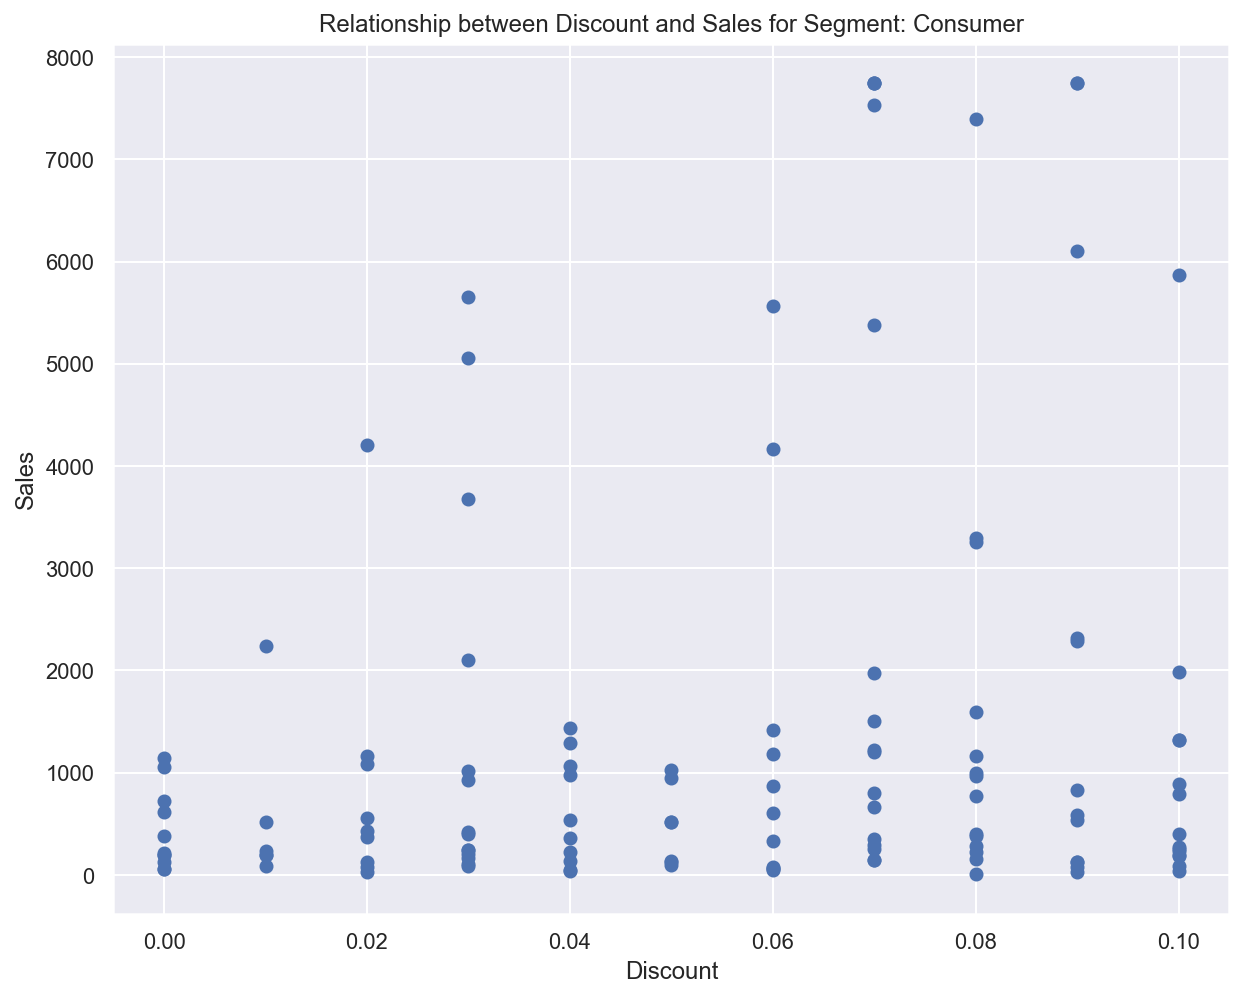

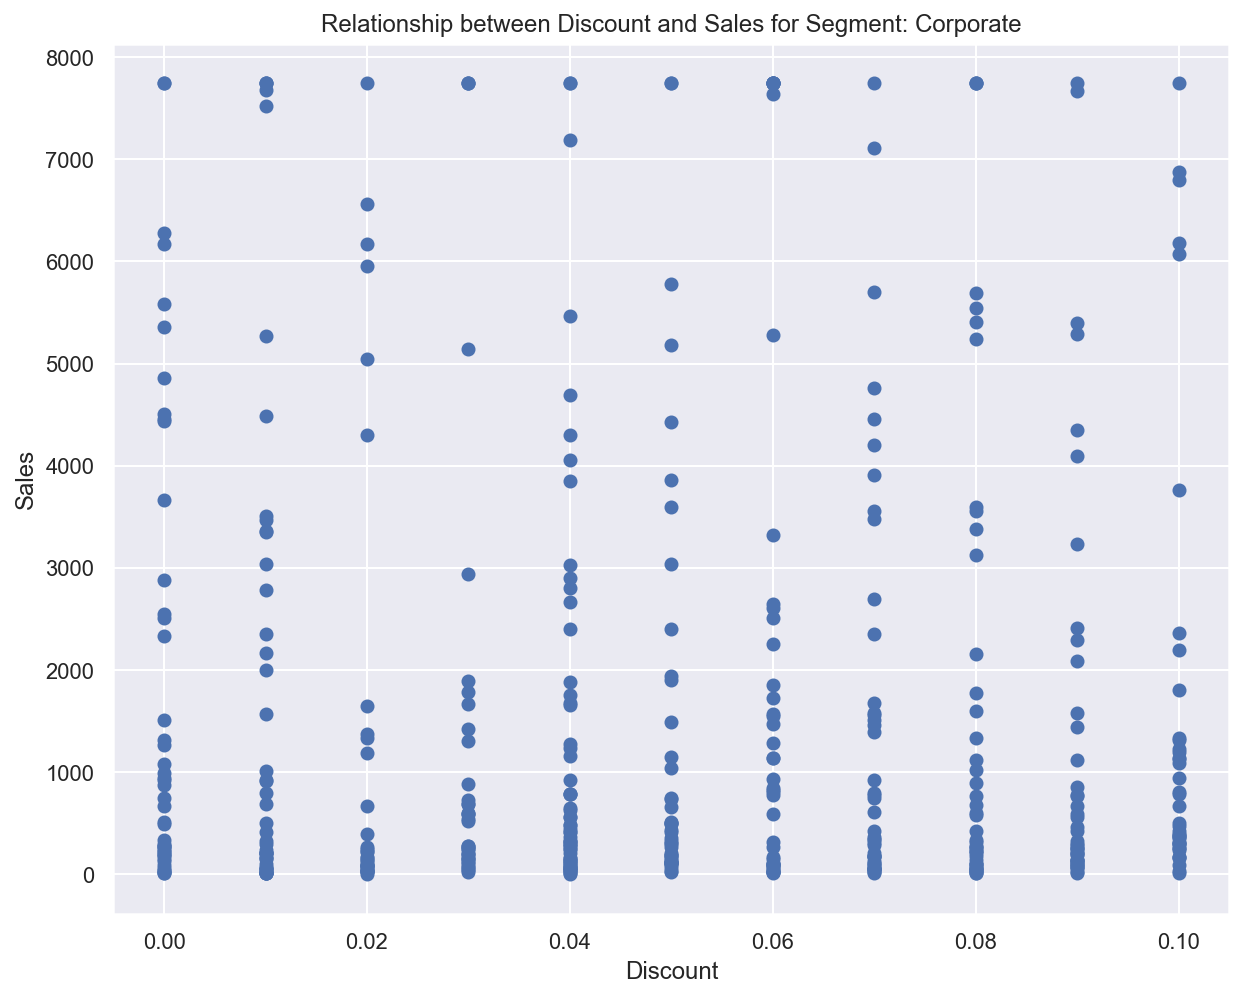

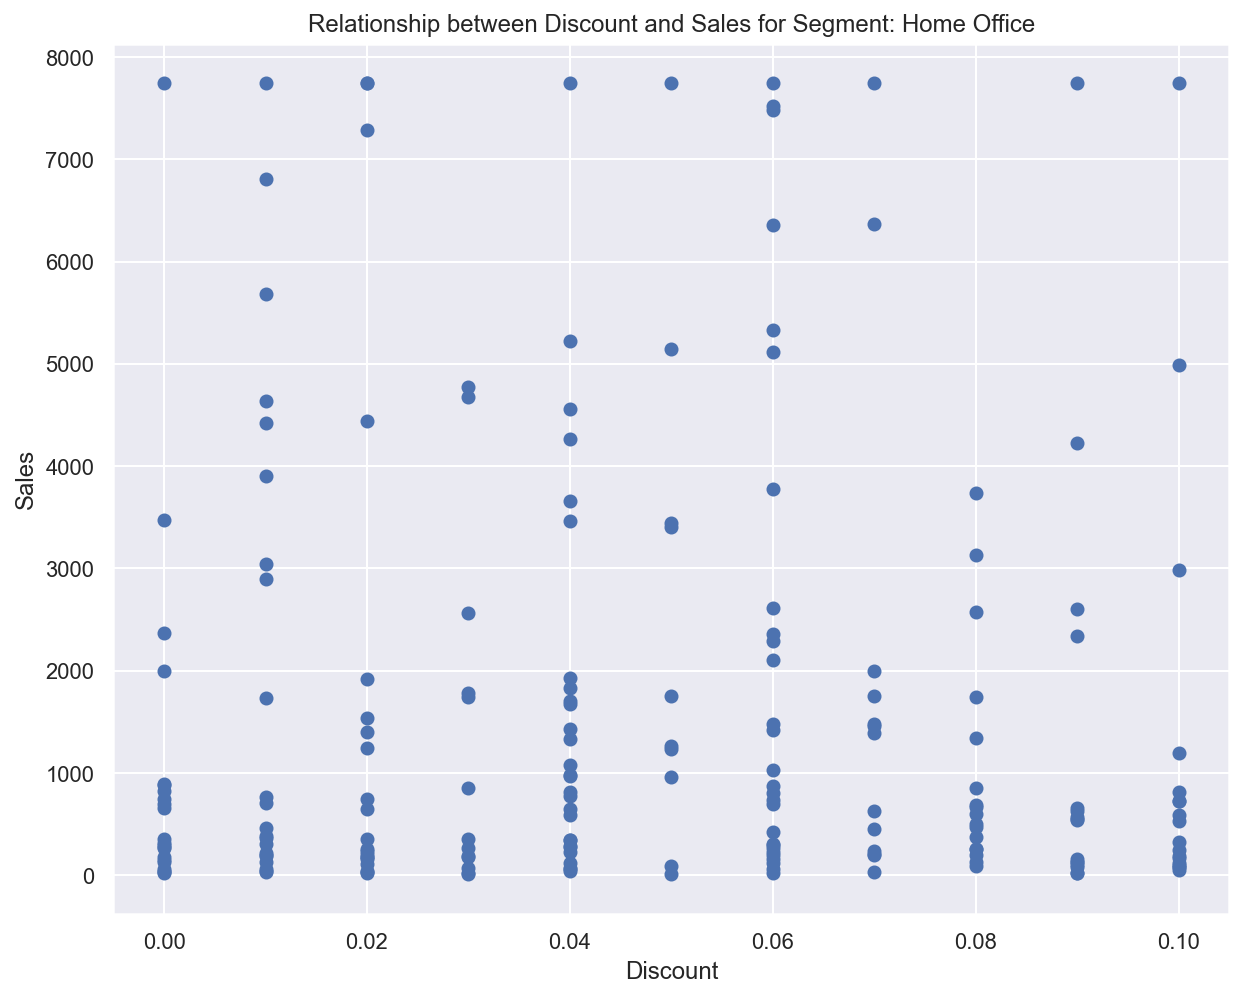

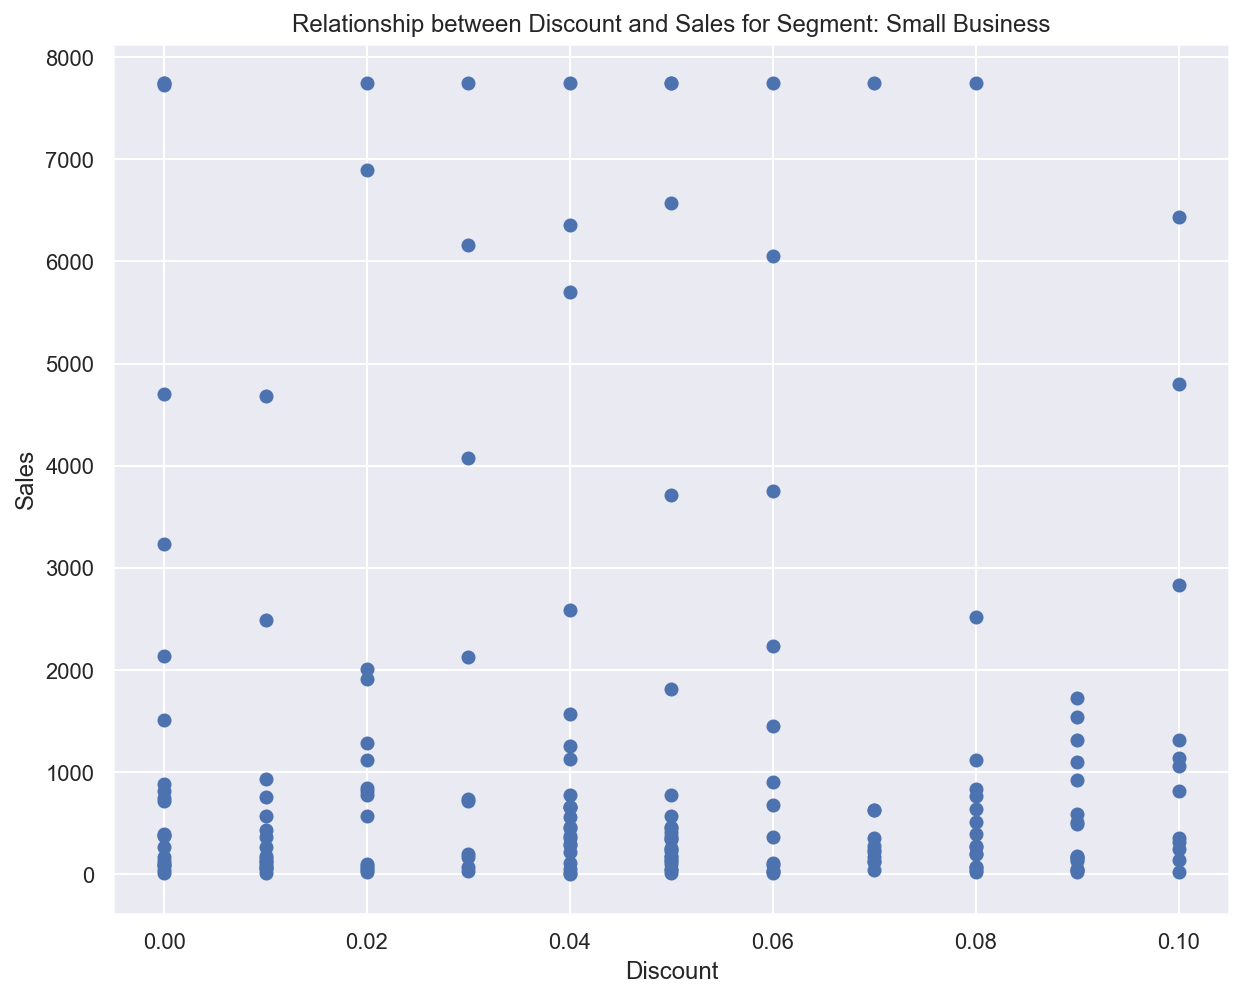

In [39]:
# Create a separate scatter plot for each segment
for segment, group in grouped_data:
    
    plt.figure()
    plt.scatter(group['Discount'], group['Sales'])

    plt.xlabel('Discount')
    plt.ylabel('Sales')
    plt.title('Relationship between Discount and Sales for Segment: {}'.format(segment))
    
    plt.show()

### There might be another factors at play influencing the relationship between Sales and Discount.
- Data quality
- Sample size
- Non-linear relationship

### 5. Analyze the sales trend over time using line plots or time series plots.

In [24]:
sales_data.to_csv('sales_data1.csv', index=False)

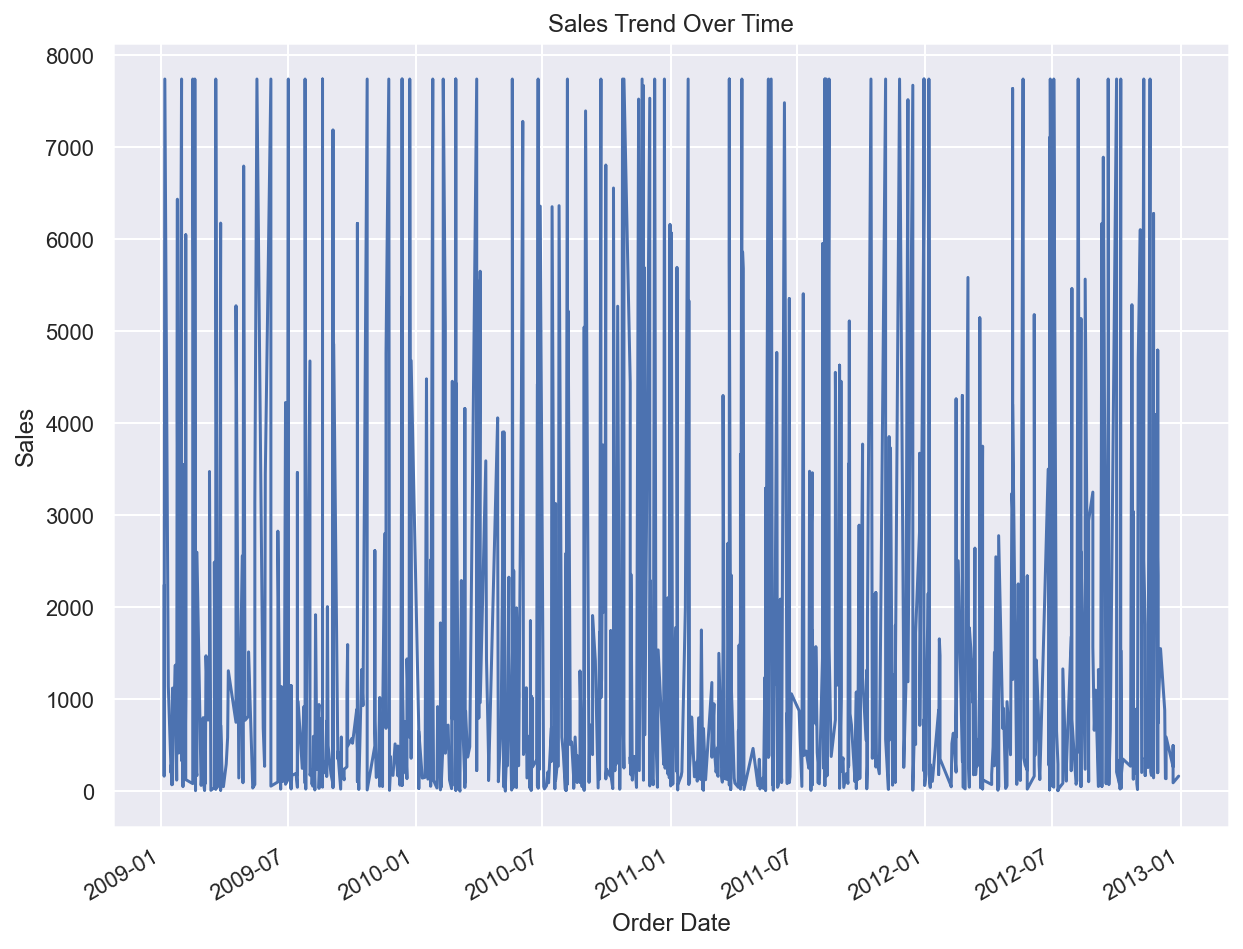

In [25]:
# Read the CSV file with 'Order Date' as the index column and parse dates
sales_time = pd.read_csv('sales_data1.csv', index_col='Order Date', parse_dates=True)

# Sort the DataFrame by the index (Order Date)
sales_time.sort_index(inplace=True)

# Plot the 'Sales' column over time
sales_time['Sales'].plot()

plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.show()

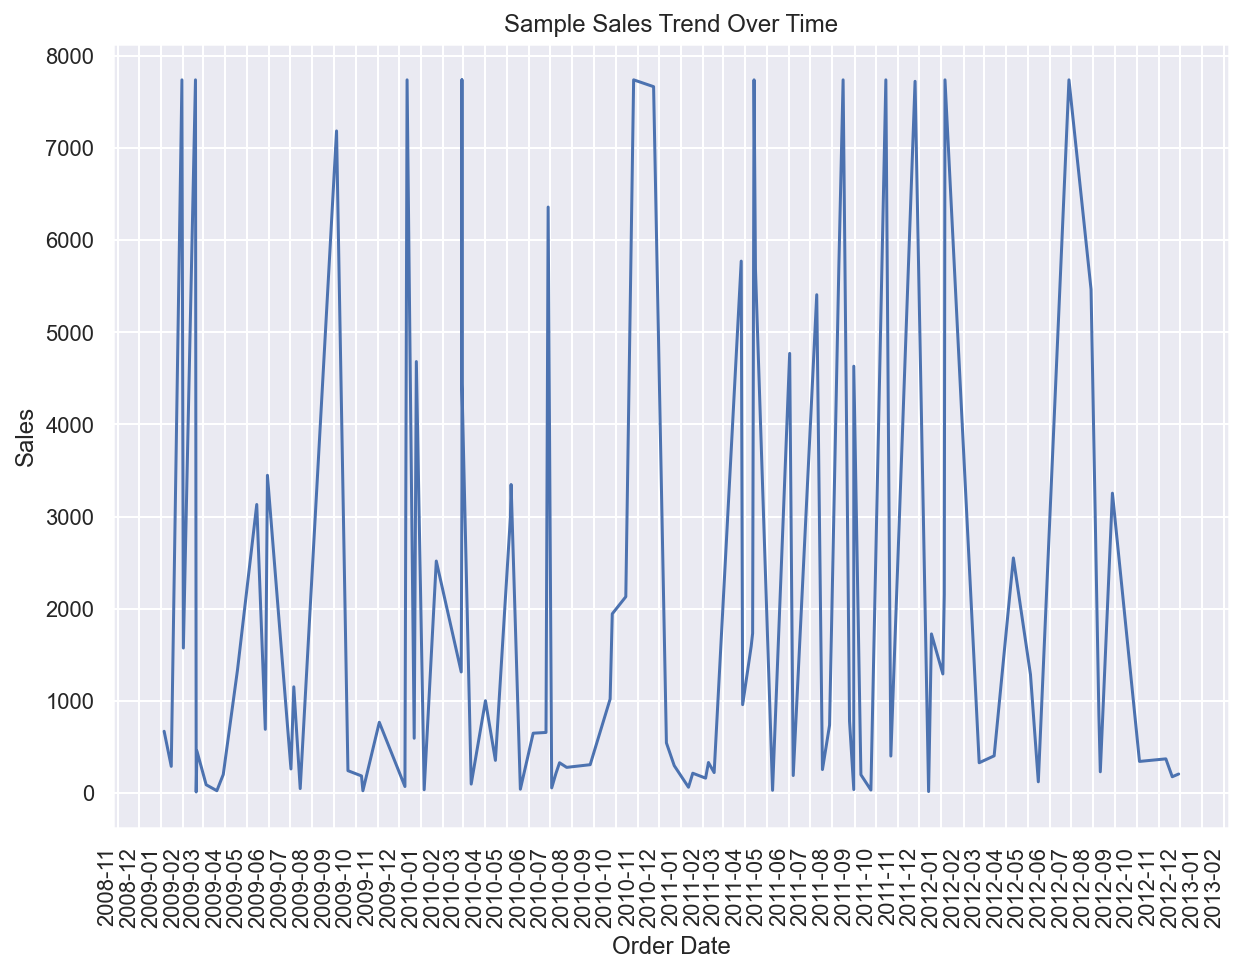

In [26]:
import matplotlib.dates as mdates

# Take a sample from the sorted data
sales_time_sample = sales_time.sample(n=100, random_state=25, axis=0)
sales_time_sample.sort_index(inplace=True)
sales_time_sample['Sales'].plot()

plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sample Sales Trend Over Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=90)
plt.show()

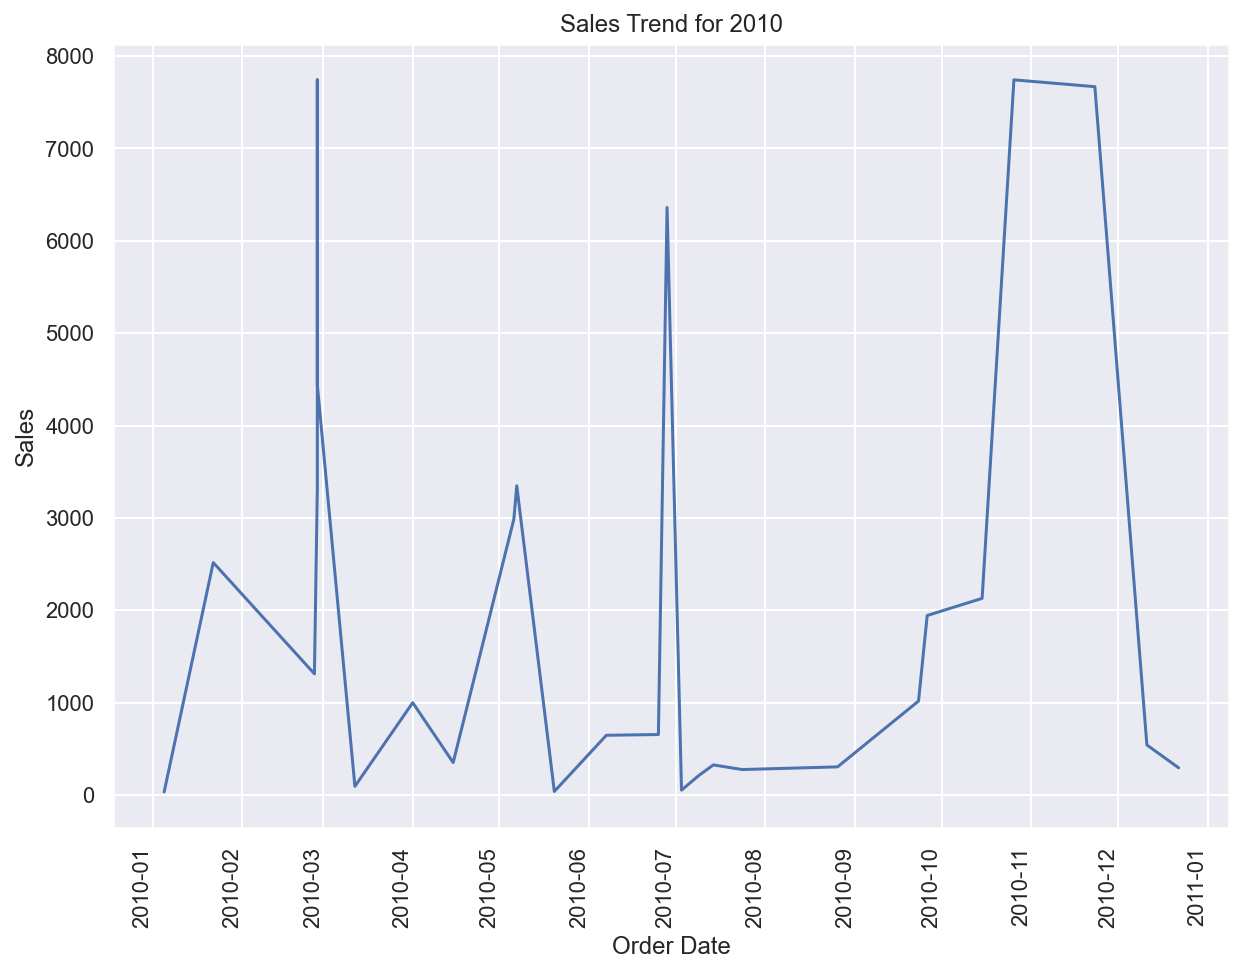

In [46]:
year_to_visualize = 2010

sales_time_year = sales_time_sample[sales_time_sample.index.year == year_to_visualize]


sales_time_year['Sales'].plot()

plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title(f'Sales Trend for {year_to_visualize}')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=90)
plt.show()

# Level 6 : Advanced Data Manipulation with Numpy

### 1. Use Numpy to calculate the mean, median, and standard deviation of the sales data.

In [27]:
import numpy as np

In [28]:
sales_arr = np.round(np.array(sales), decimals=4) #the values were displayed with exponential notation when printing the array
np.set_printoptions(suppress=True)# to suppress the use of exponential notation while printing
print(sales_arr)

[  224.2944  9485.8512   232.2837  5409.324    380.7144   132.468
    84.972    856.0552  2697.8742   203.7816   190.674    121.344
   696.96    1427.8848    77.616   1779.8918   234.2112  4265.3952
   588.8025   930.459   2779.7418    43.173     93.9645   474.903
   176.529     78.624     61.4008 11137.2525   362.3424   274.0864
    59.202    809.1426   276.5373   498.7224  1017.4464  3480.1065
   182.83    5394.4982   501.876  13676.754     36.848    398.37
   927.92      14.256     37.9008  1330.4544   181.875     34.2612
  4632.903     54.747   1201.284     43.3422   122.892    105.378
    63.92     366.03     239.0256  3733.4704  1999.2675   202.8516
  9432.1728   248.832    111.9744   287.9745   202.1382   286.512
   401.12     124.83    1263.36     459.459    786.4128  5954.872
   744.325    932.4222  1155.7632   353.0466   139.968   3239.2
     8.648    239.112   3294.06     253.1088    86.0706  2799.696
  1878.1056 11324.1744    85.365   1533.8176   168.9996  4511.36
  9499.56

In [29]:
order_quantity_arr = np.array(sales_data["Order Quantity"])
discount_arr = np.array(sales_data["Discount"])
unit_price_arr = np.array(sales_data["Unit Price"])

In [30]:
profit_arr = np.round(np.array(sales_data["Profit"]), decimals=4)
np.set_printoptions(suppress=True)

In [45]:
from scipy.stats import mode

def calculate_statistics(arr):
    mean = np.mean(arr)
    median = np.median(arr)
    
    # Calculate mode using scipy.stats.mode
    mode_result = mode(arr)
    mode_value = mode_result.mode.item() 
    mode_count = mode_result.count.item()
    
    return round(mean, 2), round(median, 2), mode_value



sales_mean, sales_median, sales_mode = calculate_statistics(sales_arr)
print("Sales Statistics --->")
print("Sales Mean is:", sales_mean)
print("Sales Median is:", sales_median)
print("Sales Mode is:", sales_mode)

order_quantity_mean, order_quantity_median, order_quantity_mode = calculate_statistics(order_quantity_arr)
print("\nOrder Quantity Statistics --->")
print("Order Quantity Mean is:", order_quantity_mean)
print("Order Quantity Median is:", order_quantity_median)
print("Order Quantity Mode is:", order_quantity_mode)

discount_mean, discount_median, discount_mode = calculate_statistics(discount_arr)
print("\nDiscount Statistics --->")
print("Discount Mean is:", discount_mean)
print("Discount Median is:", discount_median)
print("Discount Mode is:", discount_mode)

profit_mean, profit_median, profit_mode = calculate_statistics(profit_arr)
print("\nProfit Statistics --->")
print("Profit Mean is:", profit_mean)
print("Profit Median is:", profit_median)
print("Profit Mode is:", profit_mode)

unit_price_mean, unit_price_median, unit_price_mode = calculate_statistics(unit_price_arr)
print("\nUnit Price Statistics --->")
print("Unit Price Mean is:", unit_price_mean)
print("Unit Price Median is:", unit_price_median)
print("Unit Price Mode is:", unit_price_mode)

Sales Statistics --->
Sales Mean is: 1792.36
Sales Median is: 498.62
Sales Mode is: 75.7344

Order Quantity Statistics --->
Order Quantity Mean is: 25.76
Order Quantity Median is: 26.0
Order Quantity Mode is: 31

Discount Statistics --->
Discount Mean is: 0.05
Discount Median is: 0.05
Discount Mode is: 0.04

Profit Statistics --->
Profit Mean is: 804.32
Profit Median is: 226.24
Profit Mode is: 4351.6622

Unit Price Statistics --->
Unit Price Mean is: 67.06
Unit Price Median is: 22.98
Unit Price Mode is: 300.98


### 2. Perform element-wise arithmetic operations on the sales data (e.g., addition, subtraction, multiplication).

In [32]:
Discounted_Unit_Price = unit_price_arr * (1-discount_arr)
sales_amount = order_quantity_arr * Discounted_Unit_Price
print("Sales Amount:", sales_amount)

Sales Amount: [  224.2944  9485.8512   232.2837  5409.324    380.7144   132.468
    84.972    856.0552  2697.8742   203.7816   190.674    121.344
   696.96    1427.8848    77.616   1779.8918   234.2112  4265.3952
   706.563    930.459   2779.7418    43.173     93.9645   474.903
   176.529     78.624     61.4008  7449.255    362.3424   274.0864
    59.202    809.1426   276.5373   498.7224  1017.4464  3480.1065
   182.83    5394.4982   501.876   8216.754     36.848    398.37
   927.92      14.256     37.9008  1330.4544   181.875     34.2612
  4632.903     54.747   1201.284     43.3422   122.892    105.378
    63.92     366.03     239.0256  3733.4704  1999.2675   202.8516
  1733.6448   248.832    111.9744   287.9745   202.1382   286.512
   401.12     124.83    1263.36     459.459    786.4128  5954.872
   744.325    932.4222  1155.7632   353.0466   139.968   3239.2
     8.648    239.112   3294.06     253.1088    86.0706  2799.696
  1878.1056 10618.5744    85.365   1533.8176   168.9996  451

In [33]:
product_base_margin = np.array(sales_data['Product Base Margin'])
unit_cost = unit_price_arr * (1 - product_base_margin)
profit_amount = sales_amount - (order_quantity_arr * unit_cost)

print("Profit amount:", profit_amount)

Profit amount: [  172.8936      5201.9184        89.1594      2939.85
   173.8044        44.6208        30.66         401.06029333
  1294.78622       67.9272        75.114         61.936
   348.48         996.5446        27.72         917.47
    83.1072      2488.1472       455.3406       524.6205
  1600.4574        13.4316        72.2043       142.4709
   113.3502        40.608         31.3536      2784.065
   207.592        143.0016        44.252        258.237
    99.7815       387.8952       519.7824      1871.025
    67.6471      3260.411        167.292       4604.994
    11.368        147.3969       528.9144         5.04
    21.7728       748.3806        63.75          11.4204
  2667.429         17.6407       427.1232        14.8852
    40.1016        53.268         38.352        113.876
   130.3776      2394.2908      1526.3225        63.2548
  1336.3512        82.944         38.4912       154.825
    71.463        104.4575       222.36          43.362
   682.2144       348.381 

### 3. Use Numpy to reshape the sales data into a different dimension.

In [34]:
print('Sales Original Shape is : ', sales_arr.shape)

sales_arr_newshape = sales_arr.reshape((100,10))
print('Sales New Shape is : ', sales_arr_newshape.shape)

discount_arr_newshape = discount_arr.reshape((10,100))
print('\nDiscount New Shape is : ', discount_arr_newshape.shape)

unit_price_arr_newshape = unit_price_arr.reshape((1,10,100))
print('\nUnit Price New Shape is : ', unit_price_arr_newshape.shape)

Sales Original Shape is :  (1000,)
Sales New Shape is :  (100, 10)

Discount New Shape is :  (10, 100)

Unit Price New Shape is :  (1, 10, 100)


### 4. Apply broadcasting to perform operations on arrays with different shapes.

In [35]:
# np.broadcast_arrays to align the shapes for broadcasting
broadcasted_sales, broadcasted_discount = np.broadcast_arrays(sales_arr_newshape[:, :, np.newaxis], discount_arr_newshape[np.newaxis, :, :])

# Perform operations using broadcasting
total_profit = broadcasted_sales * unit_price_arr_newshape - broadcasted_sales * broadcasted_discount

print("Shape of total profit:", total_profit.shape)

Shape of total profit: (100, 10, 100)


### 5. Use Numpy to perform matrix multiplication on sales data arrays.

In [36]:
sales_dot_discount = np.dot(sales_arr_newshape,discount_arr_newshape) #(100,10) & (10,100) 
sales_dot_discount.shape

(100, 100)